<a href="https://colab.research.google.com/github/7-sumit/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Sumit Berde
##### **Team Member 2 -** Omkar Desai
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


### **Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The main aim of the project is to make prediction of rented bikes required at each hour for the stable supply of rental bikes.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setting max display column limit to 20
pd.set_option("display.max_columns", 20)

#set style
plt.style.use('seaborn')


# setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [ ]:
# Load Dataset
file_path = '/content/drive/MyDrive/Bike Sharing Demand Prediction - Sumit Berde/SeoulBikeData.csv'

df = pd.read_csv(file_path,encoding="latin")

### Dataset First View

In [ ]:
# Checking first 5 rows
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
# Checking last 5 rows
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'Total rows are: {df.shape[0]} ')
print(f'Total columns are: {df.shape[1]} ')

Total rows are: 8760 
Total columns are: 14 


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Renaming columns to remove units 
df = df.rename(columns={'Rented Bike Count':'Rented_bike_count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility',
                   'Dew point temperature(°C)':'Dew_point_temperature','Solar Radiation (MJ/m2)':'Solar_radiation','Rainfall(mm)':'Rainfall',
                   'Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_day'})

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f'The number of duplicate rows are {df.duplicated().sum()}')

The number of duplicate rows are 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                     0
Rented_bike_count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_day          0
dtype: int64

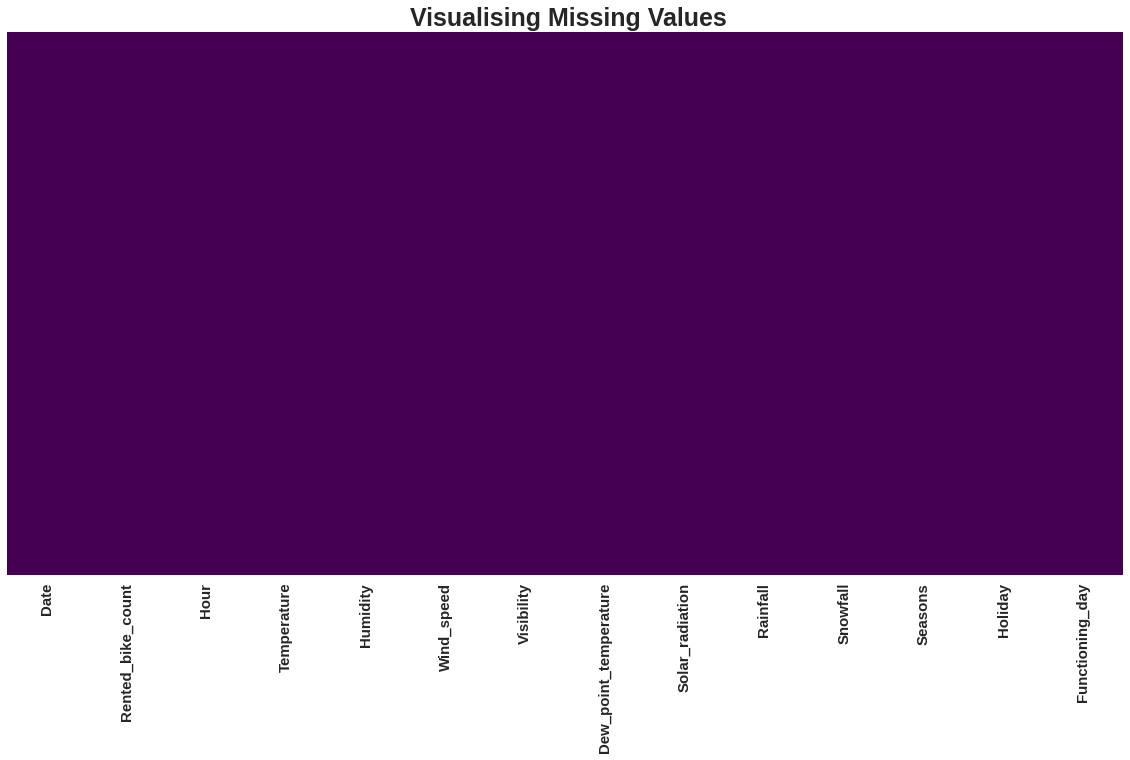

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),cmap="viridis",yticklabels=False,cbar=False)
plt.title(" Visualising Missing Values");

### What did you know about your dataset?

### The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.There are 8760 rows and 14 columns.There are no null values and no duplicate values.




## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(df.columns)

Index(['Date', 'Rented_bike_count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_day'],
      dtype='object')


In [ ]:
# Dataset Describe
df.describe().T

count         mean         std   min     25%      50%  \
Rented_bike_count      8760.0   704.602055  644.997468   0.0  191.00   504.50   
Hour                   8760.0    11.500000    6.922582   0.0    5.75    11.50   
Temperature            8760.0    12.882922   11.944825 -17.8    3.50    13.70   
Humidity               8760.0    58.226256   20.362413   0.0   42.00    57.00   
Wind_speed             8760.0     1.724909    1.036300   0.0    0.90     1.50   
Visibility             8760.0  1436.825799  608.298712  27.0  940.00  1698.00   
Dew_point_temperature  8760.0     4.073813   13.060369 -30.6   -4.70     5.10   
Solar_radiation        8760.0     0.569111    0.868746   0.0    0.00     0.01   
Rainfall               8760.0     0.148687    1.128193   0.0    0.00     0.00   
Snowfall               8760.0     0.075068    0.436746   0.0    0.00     0.00   

                           75%      max  
Rented_bike_count      1065.25  3556.00  
Hour                     17.25    23.00  
Temperature              22.50    39.40  
Humidity                 74.00    98.00  
Wind_speed                2.30     7.40  
Visibility             2000.00  2000.00  
Dew_point_temperature    14.80    27.20  
Solar_radiation           0.93     3.52  
Rainfall                  0.00    35.00  
Snowfall                  0.00     8.80

### Variables Description 



* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - Yes/No

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in ['Hour','Seasons','Holiday','Functioning_day']:
  print(f'Unique values in {i} are {df[i].unique()}')


Unique values in Hour are [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Unique values in Seasons are ['Winter' 'Spring' 'Summer' 'Autumn']
Unique values in Holiday are ['No Holiday' 'Holiday']
Unique values in Functioning_day are ['Yes' 'No']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Converting 'date' datatype to 'datetime' datatype
df['Date'] = pd.to_datetime(df['Date'])

# Extracting month from date column
df['Month']=df['Date'].dt.month

# Extracting day_name from date column
df['Day_name']=df['Date'].dt.day_name()

In [ ]:
# Checking if it is a weekend or not using 'Day_name' column
df['Is_weekend']=df['Day_name'].apply(lambda x:1 if (x=='Saturday'or x=='Sunday') else 0)

In [ ]:
# Droping columns 'Date' and 'Day_name' as we got required 'Is_weekend' column for analysis
df.drop(columns=['Date','Day_name'],axis=1,inplace=True)

In [ ]:
# Checking value counts for categorical columns
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
# Checking value counts for categorical columns
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
# Checking value counts for categorical columns
df['Functioning_day'].value_counts()

Yes    8465
No      295
Name: Functioning_day, dtype: int64

In [ ]:
# Checking value counts for categorical columns
df['Month'].value_counts()

1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64

In [ ]:
# Checking value counts for categorical columns
df['Is_weekend'].value_counts()

0    6216
1    2544
Name: Is_weekend, dtype: int64

In [ ]:
# Creating numeric features list from dataset
num_features = df.describe().columns.to_list()

# Deleting 'Month' and 'Is_weekend' from num_features as they are categorical features
del num_features[-1:-3:-1]

# Creating categorical features list from dataset
cat_features = set(df.columns)-set(num_features)

print(f'Numeric features are {num_features}')
print(f'Categorical features are {cat_features}')

Numeric features are ['Rented_bike_count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_radiation', 'Rainfall', 'Snowfall']
Categorical features are {'Is_weekend', 'Month', 'Functioning_day', 'Seasons', 'Holiday'}


### What all manipulations have you done and insights you found?

1. Date column was used to extract month,weekend_or_not features to check to check variations with respect to target variable as per seasons.
2. Categorical features do not have class imbalance, every category in the features were represented properly. 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Plotting barplot for each 'categorical variable' with respect to the target variable 'rental_bike_count'

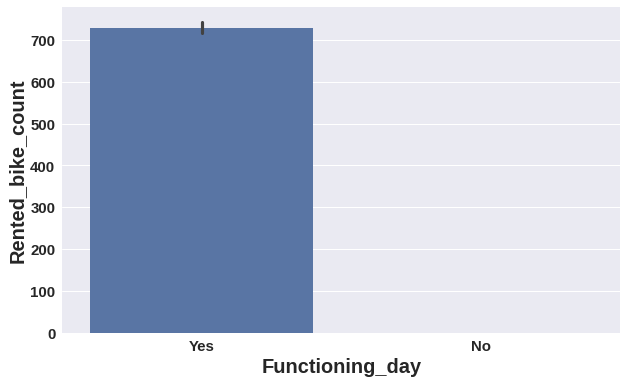

In [ ]:
# Barplot between 'Functioning_day' and 'Rented_bike_count'
plt.figure(figsize=(10,6))
sns.barplot(x=df['Functioning_day'],y=df['Rented_bike_count']);

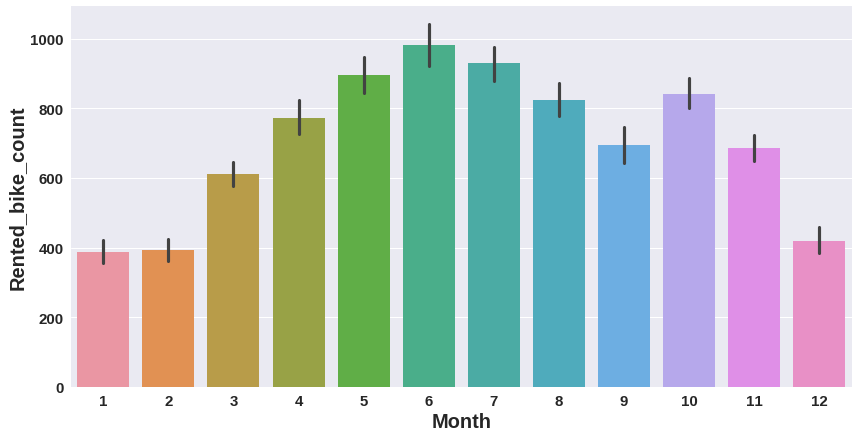

In [ ]:
# Barplot between 'Month' and 'Rented_bike_count'
plt.figure(figsize=(14,7))
sns.barplot(x=df['Month'],y=df['Rented_bike_count']);

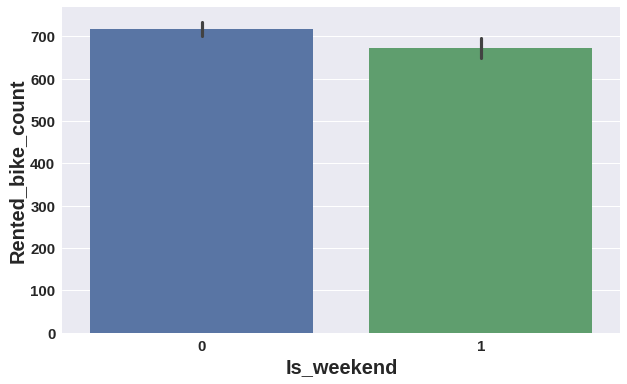

In [ ]:
# Barplot between 'Is_weekend' and 'Rented_bike_count'
plt.figure(figsize=(10,6))
sns.barplot(x=df['Is_weekend'],y=df['Rented_bike_count']);

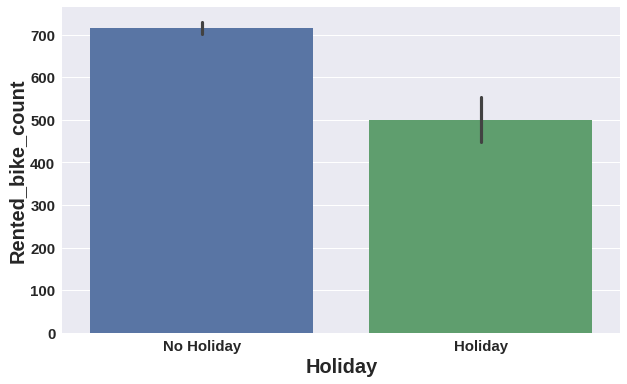

In [ ]:
# Barplot between 'Holiday' and 'Rented_bike_count'
plt.figure(figsize=(10,6))
sns.barplot(x=df['Holiday'],y=df['Rented_bike_count']);

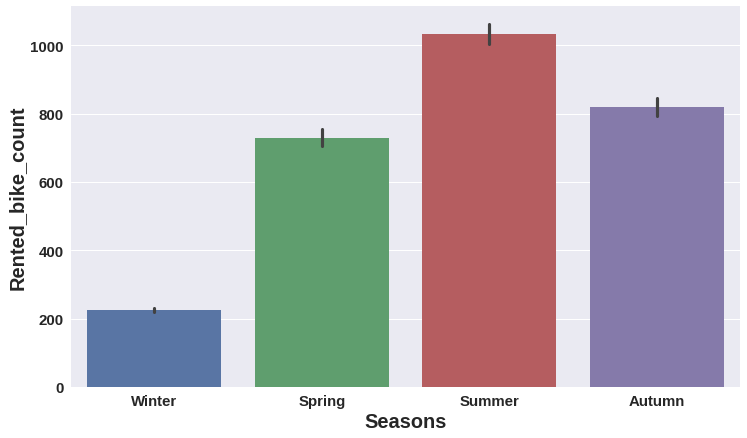

In [ ]:
# # Barplot between 'Seasons' and 'Rented_bike_count'
plt.figure(figsize=(12,7))
sns.barplot(x=df['Seasons'],y=df['Rented_bike_count']);

##### 1. Why did you pick the specific chart?

A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action. To use this plot we choose a categorical column for the x-axis and a numerical column for the y-axis, and we see that it creates a plot taking a mean per categorical column.

##### 2. What is/are the insight(s) found from the chart?

1.  On 'No functioning' day no bike was rented
2. From March bike rent count increases and it was highest in June.
3. Bike rented were more or less same on weekdays and weekends.
4. Bike rented on 'No Holiday' were more than on 'Holidays'.
5. In summer season most bikes were rented and in winter least bikes were rented      

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. On 'Non Functioning' day,looks like the company had closed the business on maintainance purposes hence no bikes were rented.
2. Bikes rented are more on 'No Holiday' as people travel to reach their offices.This gives an indication to open bike rental outlets near railway stations where people need to travel further using buses from the railway station to reach their offices. 
3. People don't like to rent bikes in winter season due to snowfall and rainfall.

#### Plotting regreesion plot between 'Numeric features' and target variable 'Rented_bike_count'

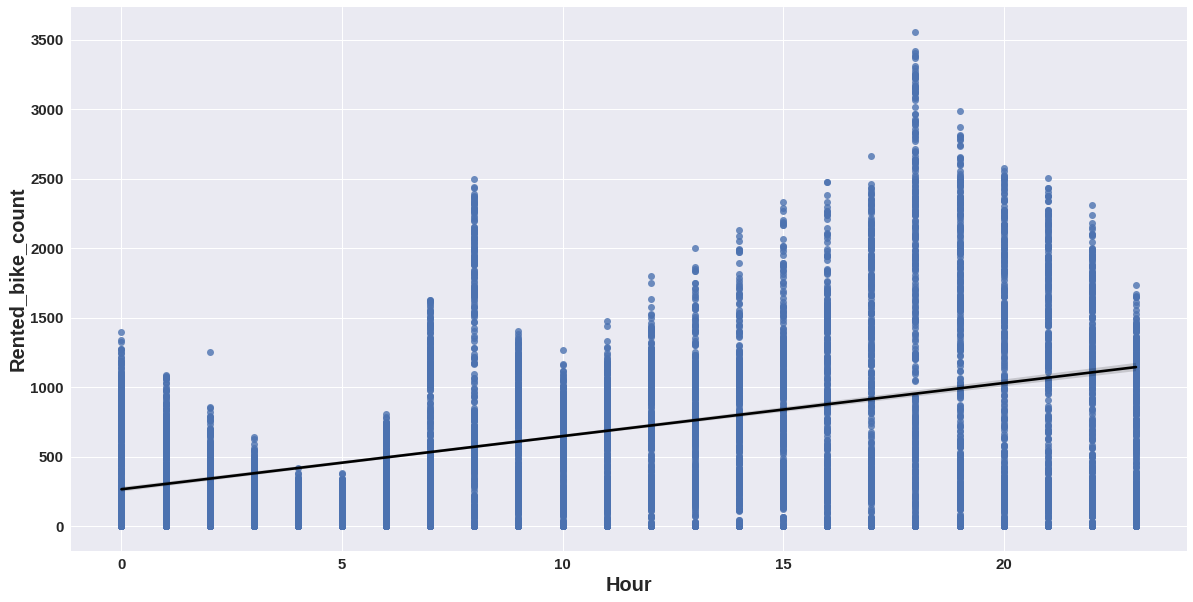

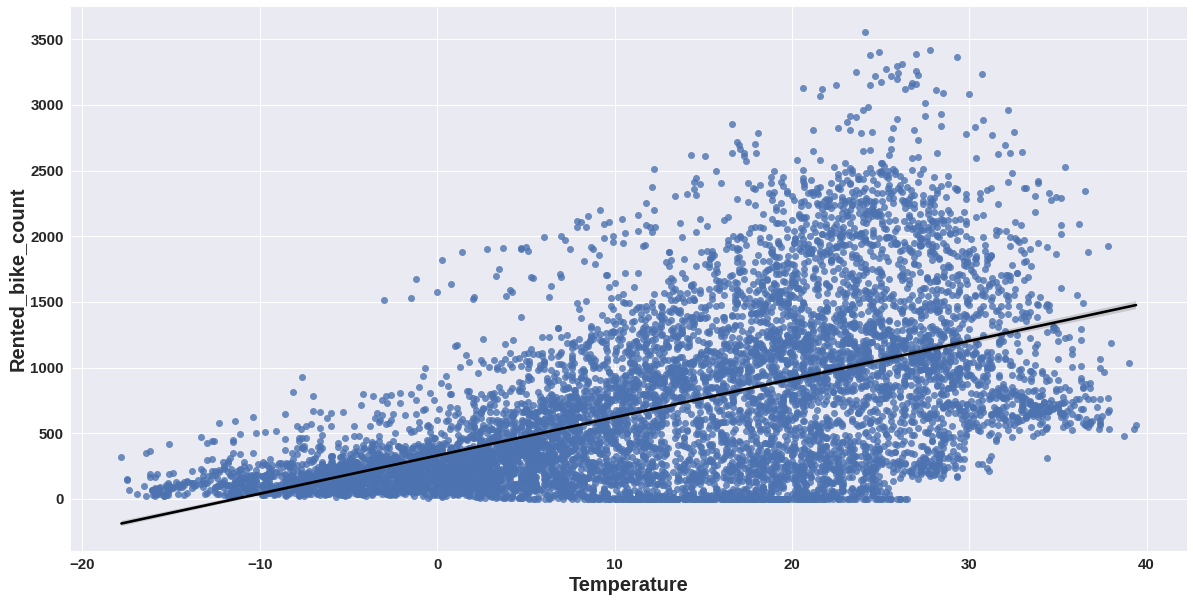

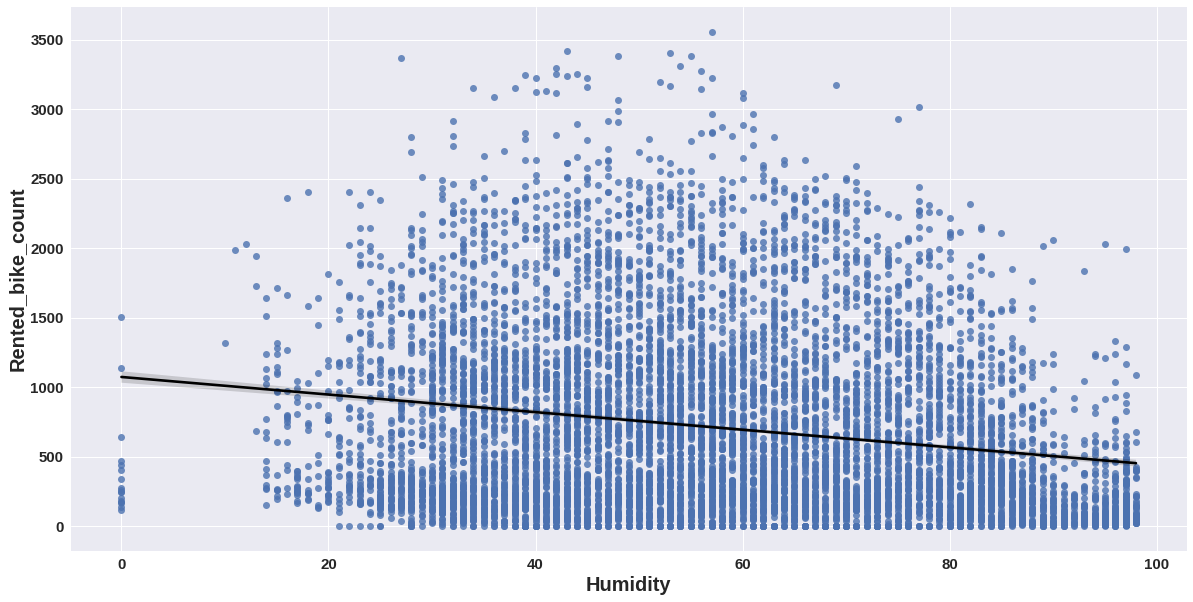

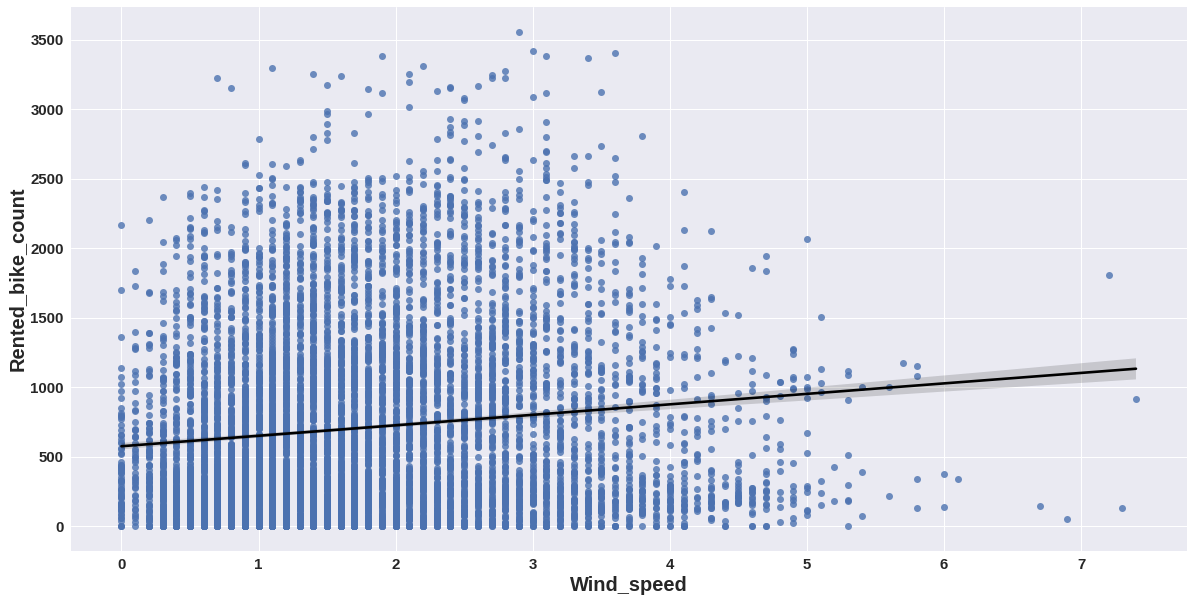

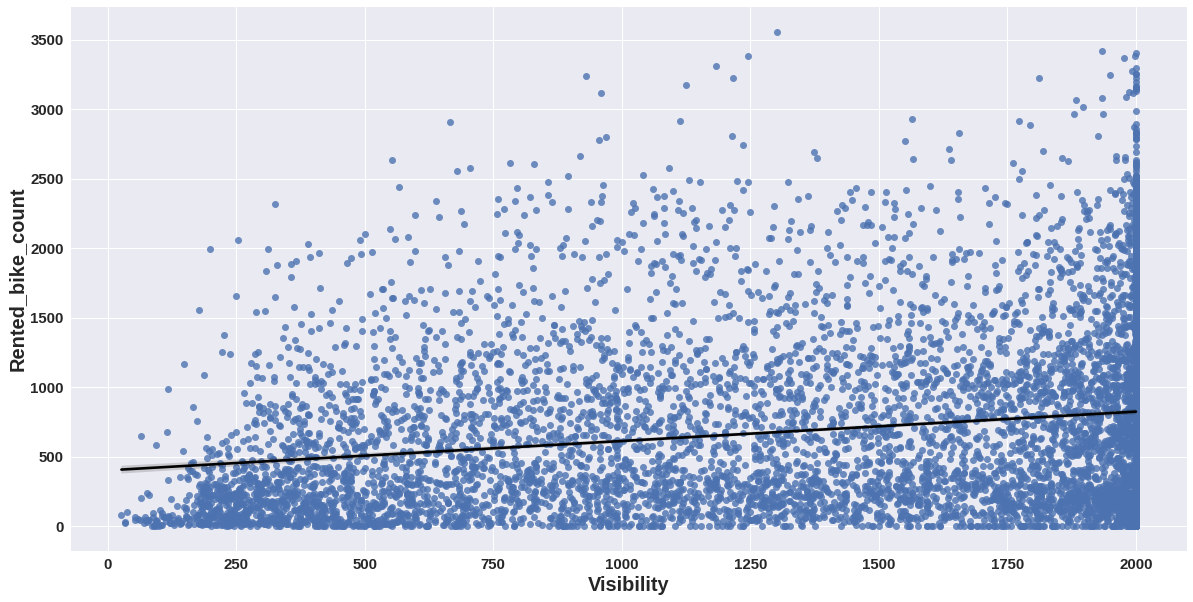

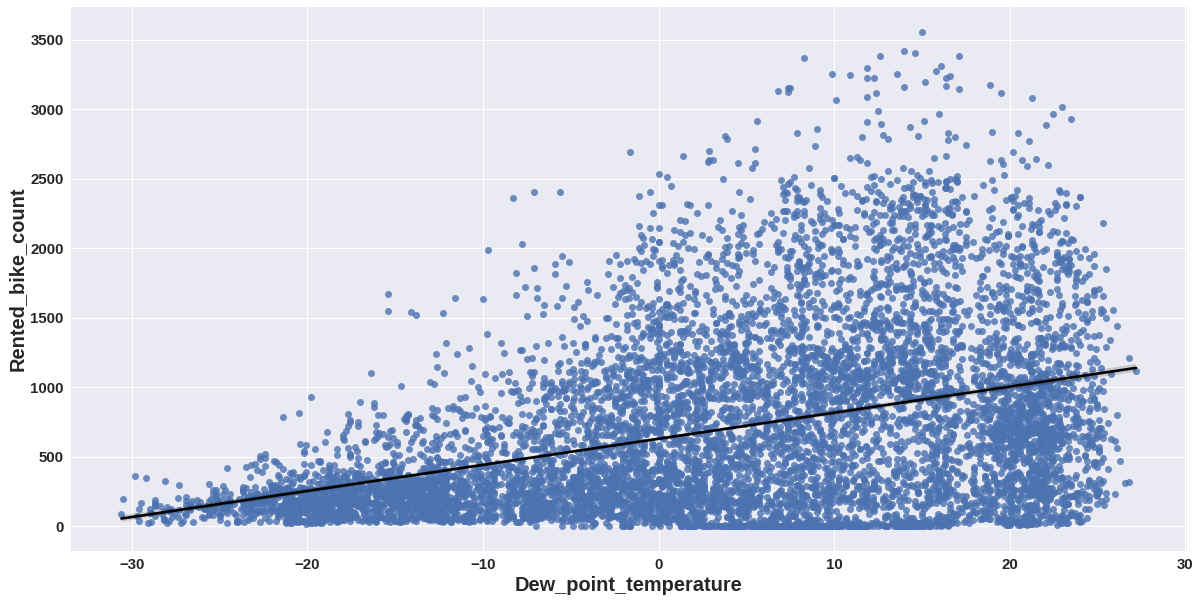

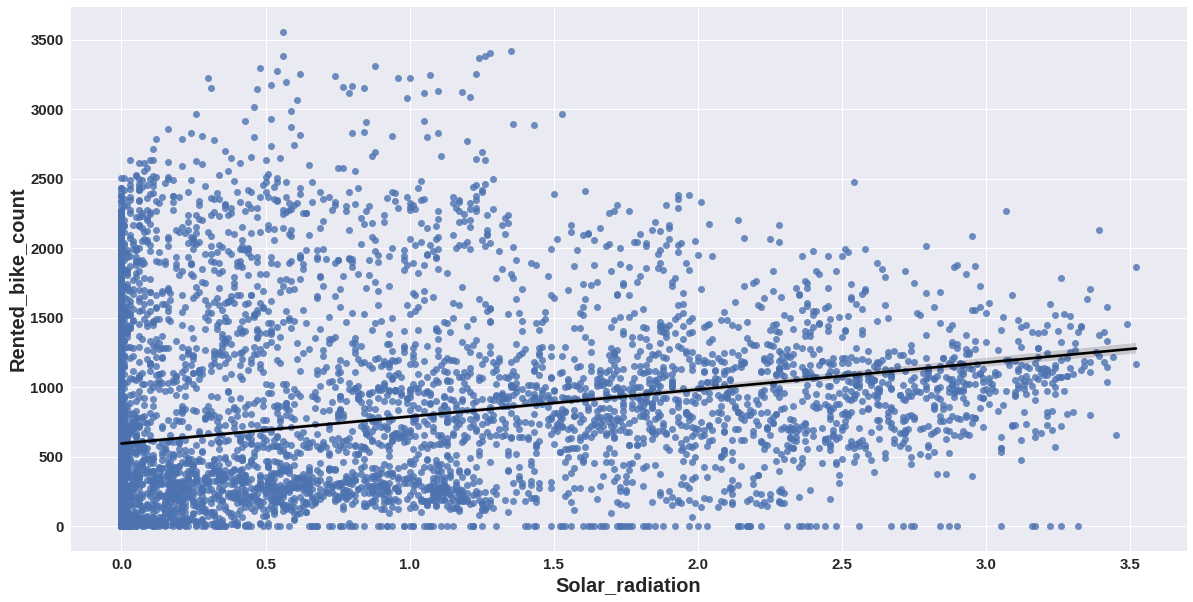

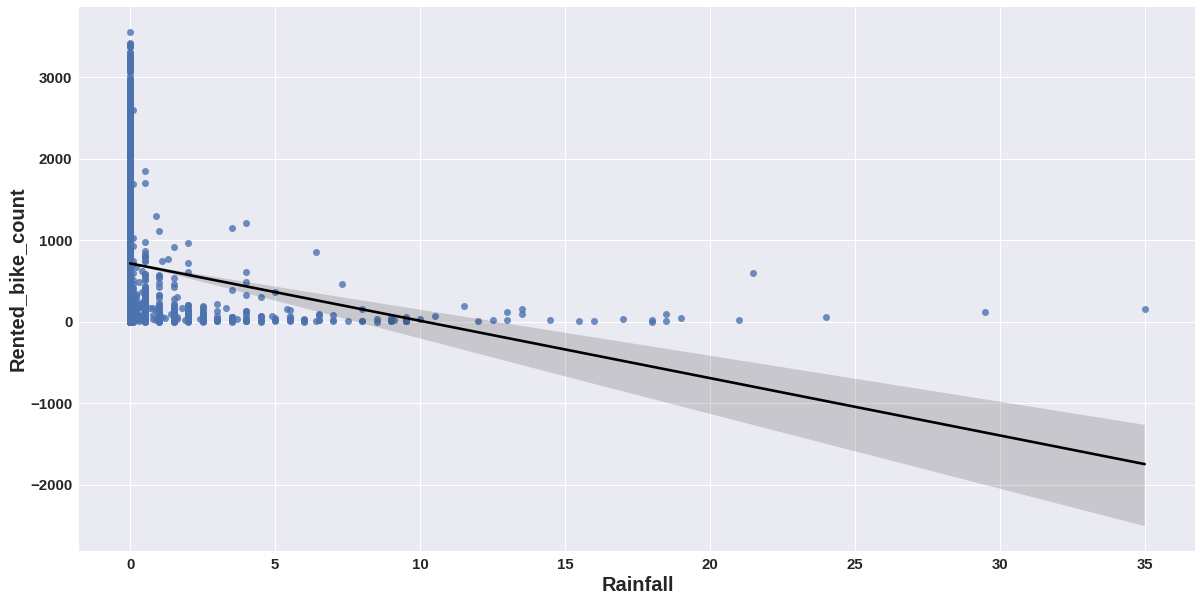

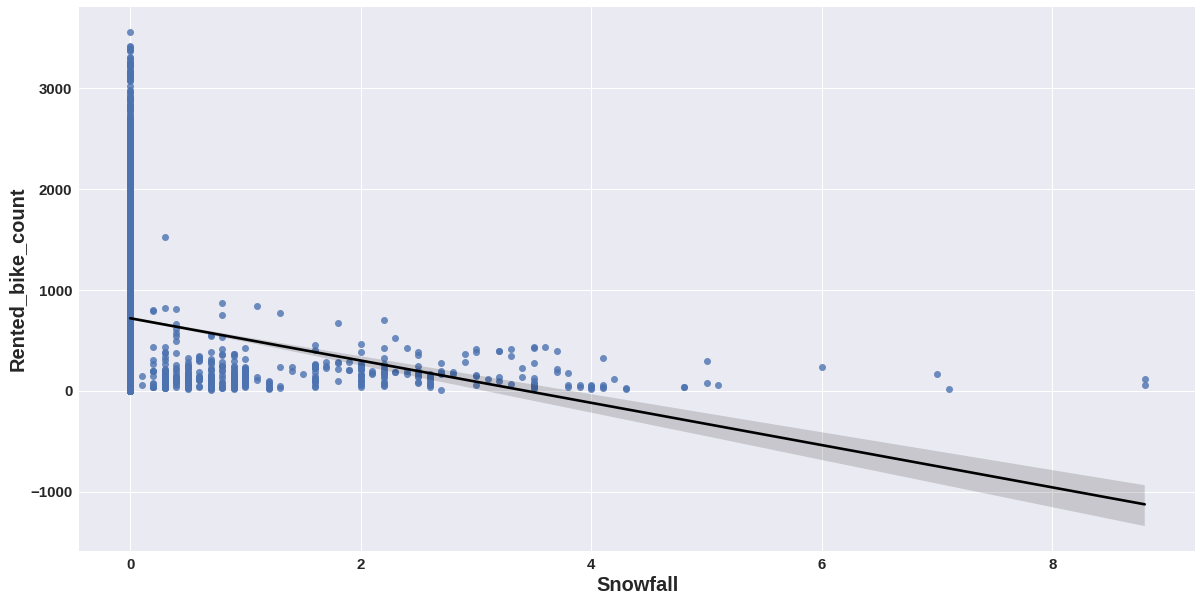

In [ ]:
# Plotting regression line between 'Numeric features' and 'Rented_bike_count' to check linearity
for col in num_features[1:]:
 plt.figure(figsize=(20,10))
 sns.regplot(x=df[col],y=df['Rented_bike_count'],line_kws={'color':'black'})

##### 1. Why did you pick the specific chart?

Regression plot is plotted between continuous variables to check wheather linearity exist or not and tries to fit the best line possible   

##### 2. What is/are the insight(s) found from the chart?

1. Some kind of linearity exists between 'rented_bike_count' and 'temperature'.As temperature increases rented_bike_count also increases. People don't like to rent bike in cold temperatures which is shown above where rented_bike_count is less in winter.
2. Very little linearity exist between 'rented_bike_count' and 'humidity','wind_speed','visibility' and 'solar_radiation'.
3. Some linearity exist between 'rented_bike_count' and 'dew_point_temperature'.Same relationship as temperature.
4. Strong relationship exist between 'rented_bike_count' and 'rainfall' and 'snowfall'. As snowfall increases rented_bike_count decreases, same indication as less bike counts in winter. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. Only 'temperature','dew_point_temperature' shows some kind of linear relationship.
2. Every other column is not linearly dependent on target variable.
3. Thus linear model will have less accuracy as only few columns show linear relationship.

#### Plotting Pointplot to check variation of 'rented_bike_count' with respect to 'hour of the day' taking categorical columns into consideration. 

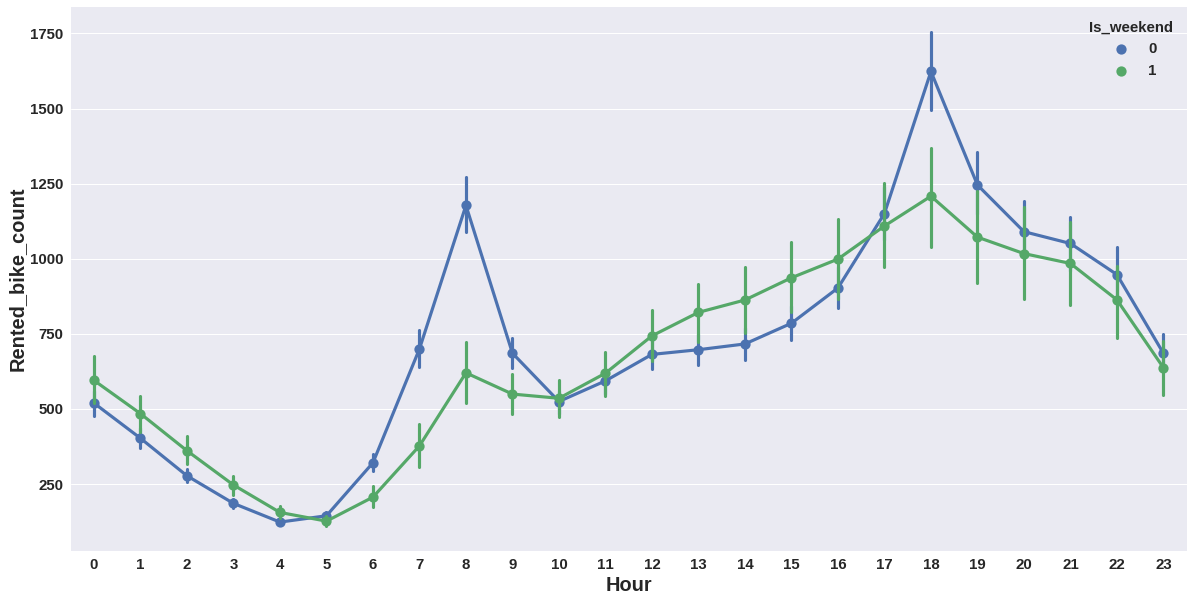

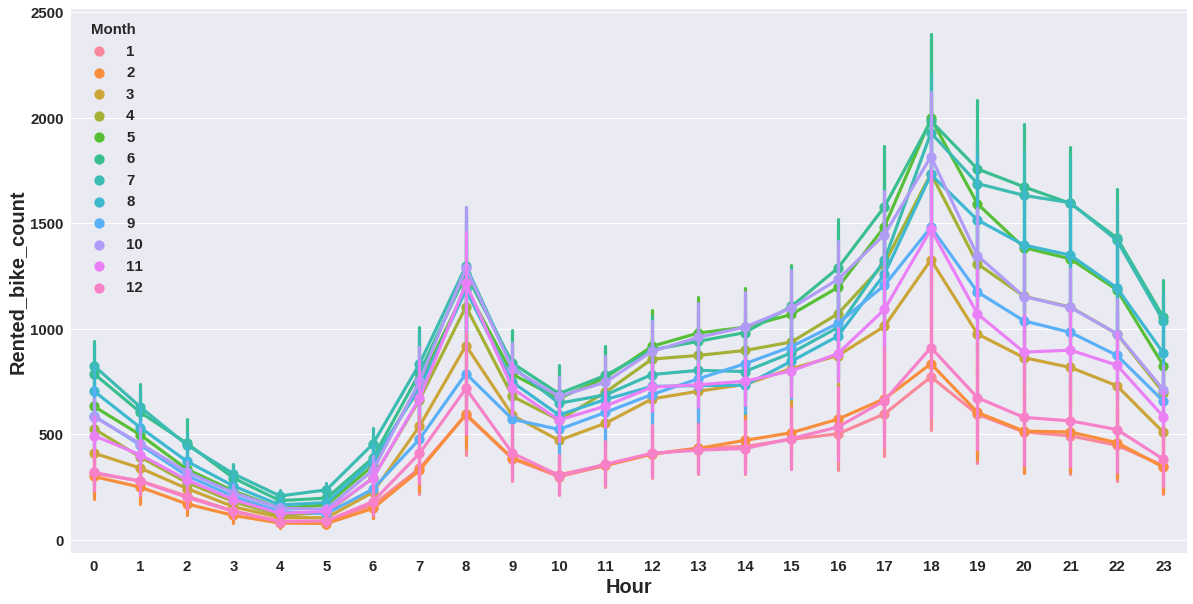

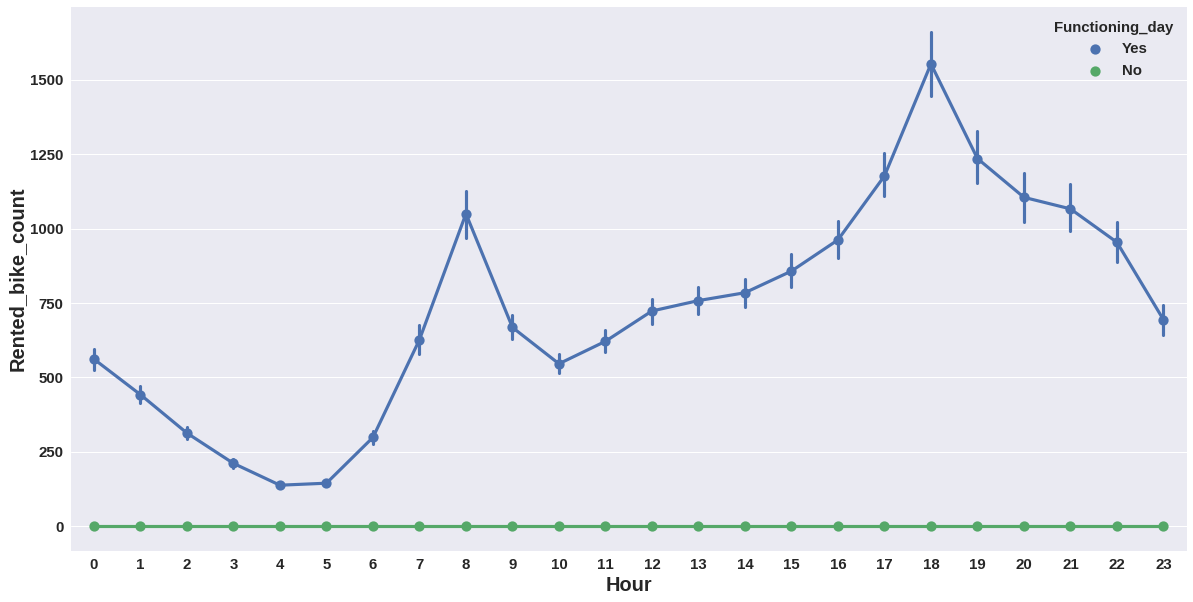

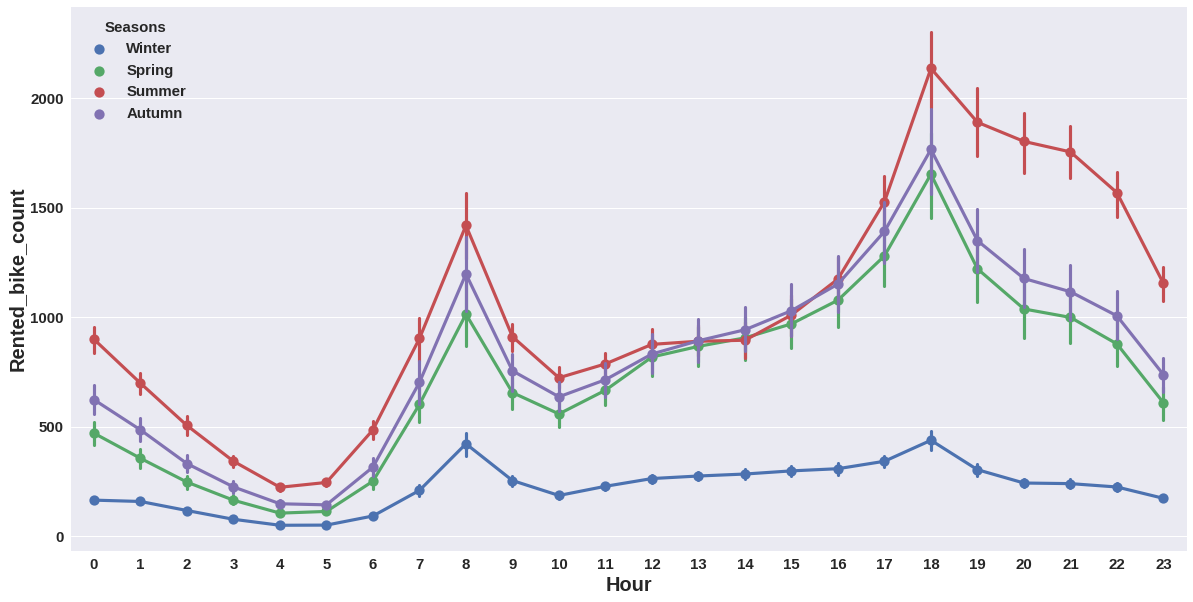

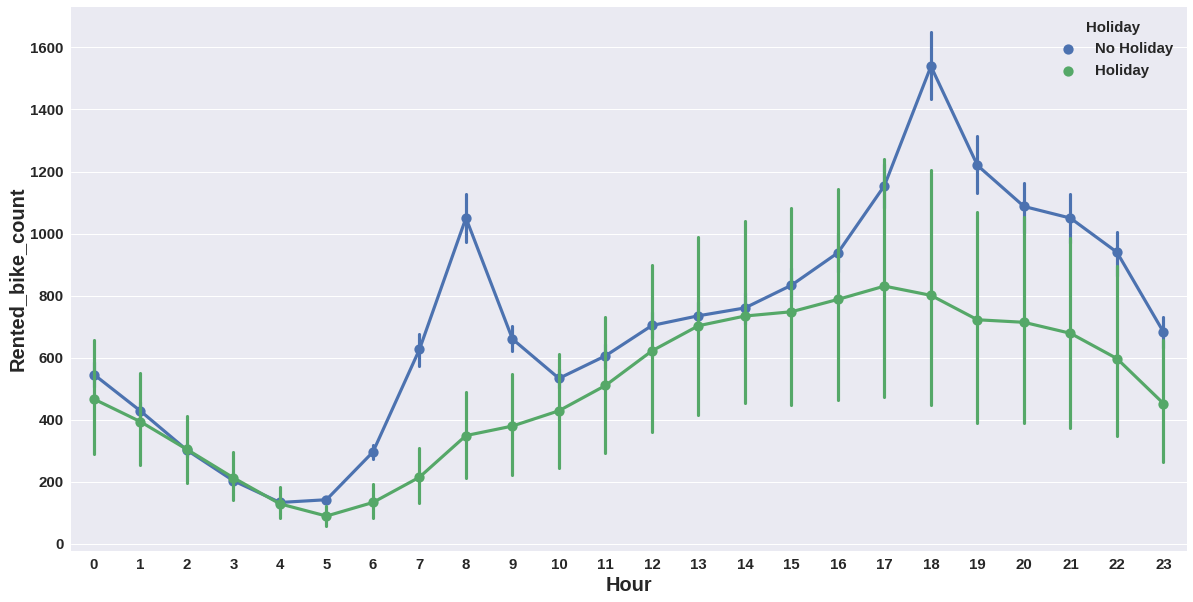

In [ ]:
# Chart - 3 visualization code
for col in cat_features:
 plt.figure(figsize=(20,10))
 sns.pointplot(x=df['Hour'],y=df['Rented_bike_count'],hue=df[col])

##### 1. Why did you pick the specific chart?

Point plot helps to visualize the trends in 'rented_bike_count' per hour basis with respect to different categorical columns

##### 2. What is/are the insight(s) found from the chart?

1. It is clear that maximum bikes are rented during office opening and closing hrs.
2. Maximum bikes are rented during night time from 5PM to 10PM.Same trend as be observed in different seasons(winter having the lowest bike rental counts),across months,across non holidays and across weekends.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Best time for bike rental business is during summer season from 5PM to 10PM during the night time.

In [ ]:
df.head()

Rented_bike_count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_day  Month  Is_weekend  
0  No Holiday             Yes      1           0  
1  No Holiday             Yes      1           0  
2  No Holiday             Yes      1           0  
3  No Holiday             Yes      1           0  
4  No Holiday             Yes      1           0

In [ ]:
df['Functioning_day'].value_counts()

Yes    8465
No      295
Name: Functioning_day, dtype: int64

In [ ]:
# Taking only functioning days into account.Hence droping 298 rows 
df = df[df['Functioning_day']=='Yes']

# Droping 'Functioning_day' feature as it is no point keeping 'Yes' category in categorical column.
df.drop(columns=['Functioning_day'],axis=1,inplace=True)

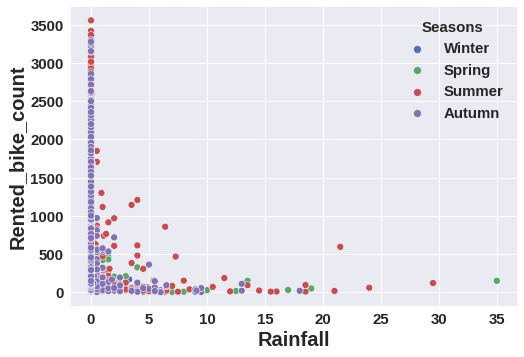

In [ ]:
sns.scatterplot(x=df['Rainfall'],y=df['Rented_bike_count'],hue=df['Seasons'])

In [ ]:
df.groupby(['Seasons','Rainfall'])['Rented_bike_count'].median()

Seasons  Rainfall
Autumn   0.0         898.5
         0.1         234.0
         0.2         188.5
         0.3         198.0
         0.5         201.0
                     ...  
Winter   3.7          32.0
         4.5           7.0
         6.4           3.0
         9.0          10.0
         9.5           7.5
Name: Rented_bike_count, Length: 117, dtype: float64

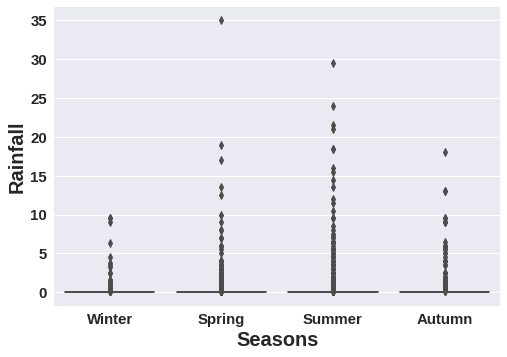

In [ ]:
sns.boxplot(y=df['Rainfall'],x=df['Seasons'])

In [ ]:
df1 = df[df['Seasons']=='Winter']

In [ ]:
df1['Rainfall'].value_counts()

0.0    2119
0.1       6
0.2       6
0.3       4
0.4       3
0.5       3
1.0       2
2.5       2
1.6       2
9.5       2
3.3       1
4.5       1
3.7       1
1.5       1
1.4       1
1.1       1
0.9       1
3.5       1
6.4       1
0.7       1
9.0       1
Name: Rainfall, dtype: int64

In [ ]:
df1.groupby('Rainfall')['Rented_bike_count'].median()

Rainfall
0.0    207.0
0.1    171.0
0.2     90.0
0.3     42.5
0.4     42.0
0.5    117.0
0.7    165.0
0.9    146.0
1.0     39.0
1.1     62.0
1.4    100.0
1.5     60.0
1.6     41.5
2.5     80.5
3.3    170.0
3.5     38.0
3.7     32.0
4.5      7.0
6.4      3.0
9.0     10.0
9.5      7.5
Name: Rented_bike_count, dtype: float64

In [ ]:
df2 = df[df['Seasons']=='Summer']

In [ ]:
df2['Rainfall'].value_counts()

0.0     2011
0.5       48
1.0       24
0.1       21
1.5       20
3.5        9
0.4        7
2.5        6
2.0        6
4.0        5
5.5        4
0.2        4
6.5        4
4.5        4
3.0        3
5.0        2
9.5        2
18.5       2
24.0       1
0.8        1
1.1        1
1.6        1
1.3        1
7.0        1
15.5       1
7.3        1
8.5        1
29.5       1
0.3        1
0.9        1
6.4        1
8.0        1
6.0        1
7.5        1
12.0       1
21.5       1
4.9        1
14.5       1
16.0       1
10.5       1
5.4        1
11.5       1
13.5       1
21.0       1
Name: Rainfall, dtype: int64

In [ ]:
df2.groupby('Rainfall')['Rented_bike_count'].median().sort_values(ascending=False)

Rainfall
0.9     1301.0
0.0      971.0
6.4      858.0
1.3      764.0
1.1      740.0
21.5     596.0
4.0      481.0
7.3      468.0
0.2      329.5
0.1      310.0
1.6      309.0
0.5      193.0
11.5     187.0
0.3      186.0
0.4      164.0
5.4      154.0
8.0      153.0
29.5     122.0
2.0      108.0
1.5       97.5
13.5      94.0
7.0       84.0
0.8       83.0
10.5      72.0
4.5       69.5
4.9       65.0
24.0      61.0
1.0       59.5
18.5      53.5
6.5       52.0
2.5       49.5
8.5       39.0
3.0       38.0
3.5       30.0
5.5       25.5
14.5      24.0
9.5       20.0
21.0      19.0
6.0       16.0
12.0      13.0
5.0       12.5
16.0      11.0
15.5      10.0
7.5        9.0
Name: Rented_bike_count, dtype: float64

In [ ]:
def binning(x):
 
  if x['Rainfall']<=2.5:
    return 'Low'
  elif x['Rainfall']>2.5:
    return 'High'


In [ ]:
df3 = df.copy()

In [ ]:
df3['Binned_rainfall'] = df.apply(lambda x:binning(x),axis=1)

In [ ]:
df3['Binned_rainfall'].value_counts()

Low     8341
High     124
Name: Binned_rainfall, dtype: int64

In [ ]:
df3.groupby(['Seasons','Binned_rainfall'])['Rented_bike_count'].count()

Seasons  Binned_rainfall
Autumn   High                 23
         Low                1914
Spring   High                 38
         Low                2122
Summer   High                 55
         Low                2153
Winter   High                  8
         Low                2152
Name: Rented_bike_count, dtype: int64

In [ ]:
df3.groupby(['Seasons','Binned_rainfall'])['Rented_bike_count'].median()

Seasons  Binned_rainfall
Autumn   High                28.0
         Low                876.5
Spring   High                18.5
         Low                613.0
Summer   High                53.0
         Low                926.0
Winter   High                10.5
         Low                204.0
Name: Rented_bike_count, dtype: float64

In [ ]:
def v_binning(x):
  if x['Visibility']<=500:
    return 'Heavy_snow'
  elif x['Visibility']<1000:
    return 'Medium_snow'
  else:
    return 'Light_snow'   


In [ ]:
df3['Binned_visibity'] = df.apply(lambda x:v_binning(x),axis=1)

In [ ]:
df3['Binned_visibity'].value_counts()

Light_snow     6155
Medium_snow    1275
Heavy_snow     1035
Name: Binned_visibity, dtype: int64

In [ ]:
df3.groupby(['Binned_visibity'])['Rented_bike_count'].median()

Binned_visibity
Heavy_snow     230.0
Light_snow     642.0
Medium_snow    506.0
Name: Rented_bike_count, dtype: float64

#### Chart - 4

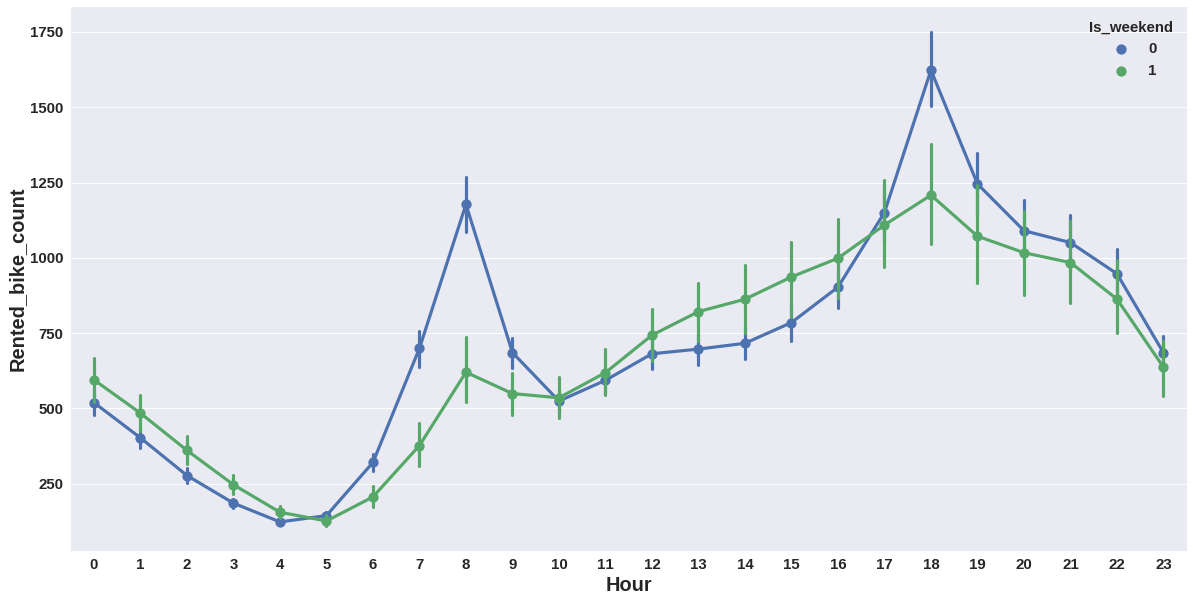

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(20,10))
sns.pointplot(x=df['Hour'],y=df['Rented_bike_count'],hue=df['Is_weekend'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

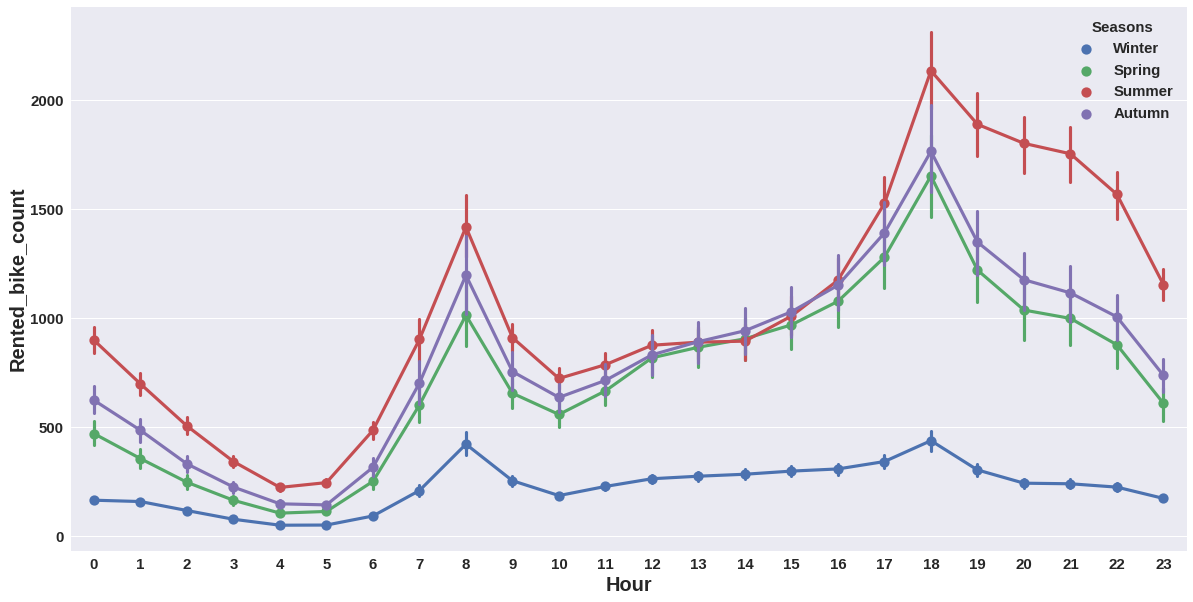

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(20,10))
sns.pointplot(x=df['Hour'],y=df['Rented_bike_count'],hue=df['Seasons'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

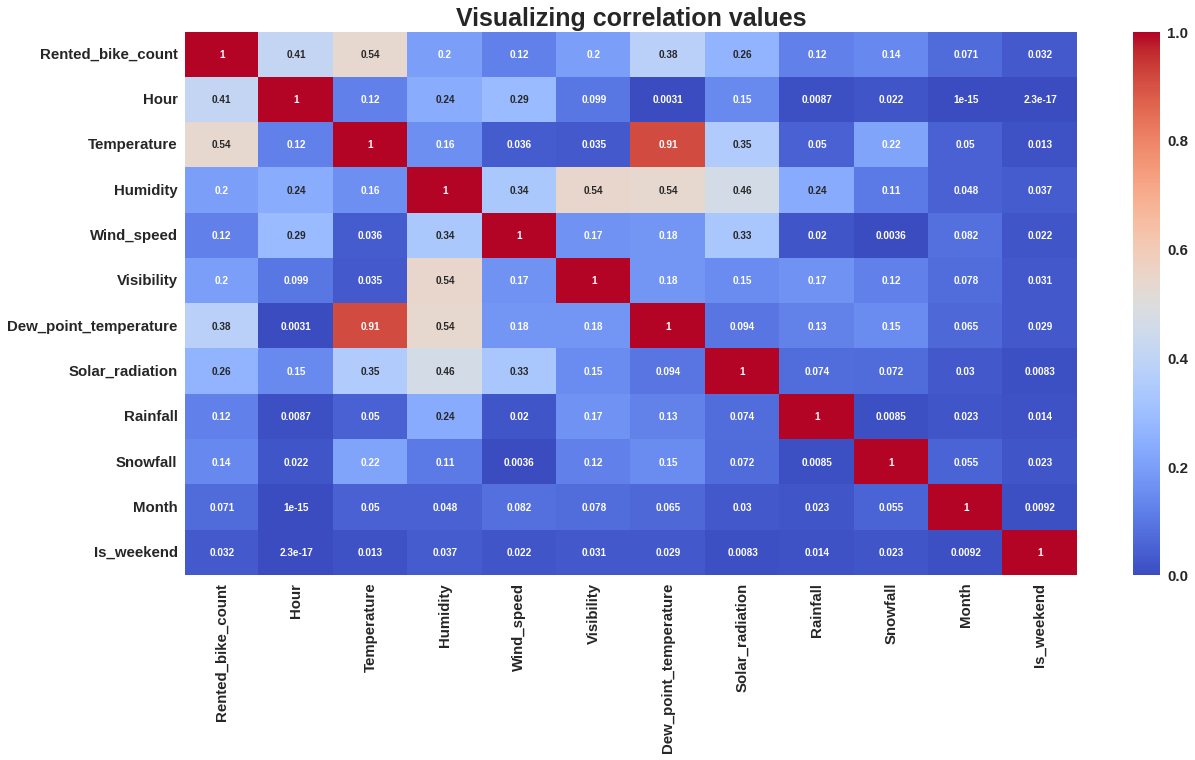

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,10))
sns.heatmap(abs(df.corr()),cmap='coolwarm',annot=True)
plt.title("Visualizing correlation values");

##### 1. Why did you pick the specific chart?

Heatmap helps to visualize the Pearsons correlation coeffient properly

##### 2. What is/are the insight(s) found from the chart?

1. 'Temperature' and 'Dew_point_temperature' are highly correlated.
2. 'Humidity' and 'Visibility','Humidity' and 'Dew_point_temperature','Humidity' and 'Solar Radiation' are highly correlated to eachother.
3. Target variable 'Rented_bike_count' is highly correlated to 'hour' and 'temperature' which means these are important features. 

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

There were no missing values in the dataset

### 2. Handling Outliers

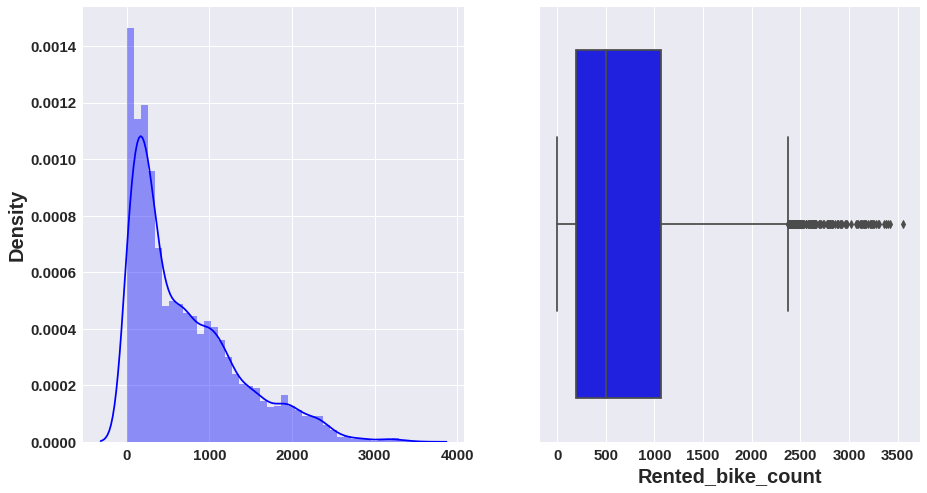

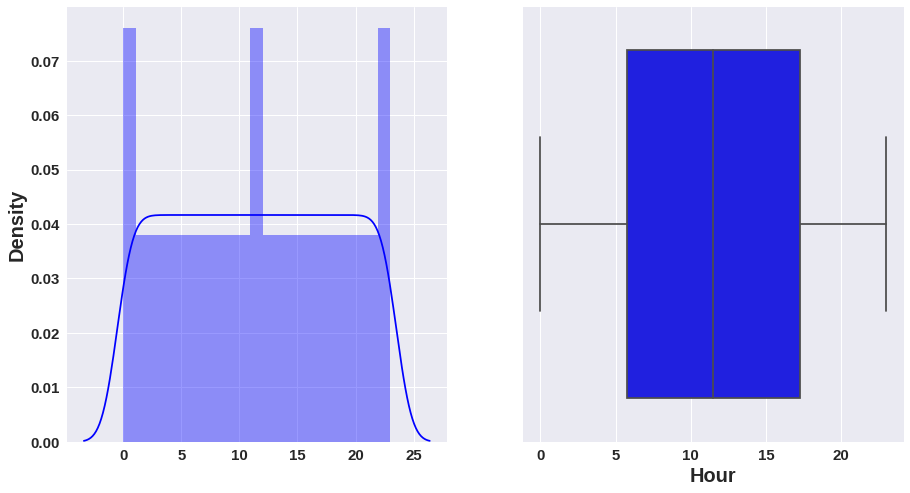

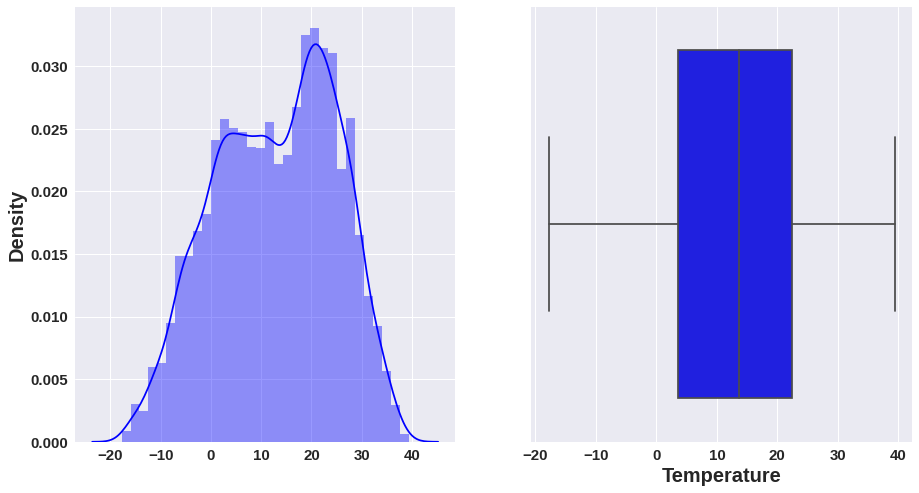

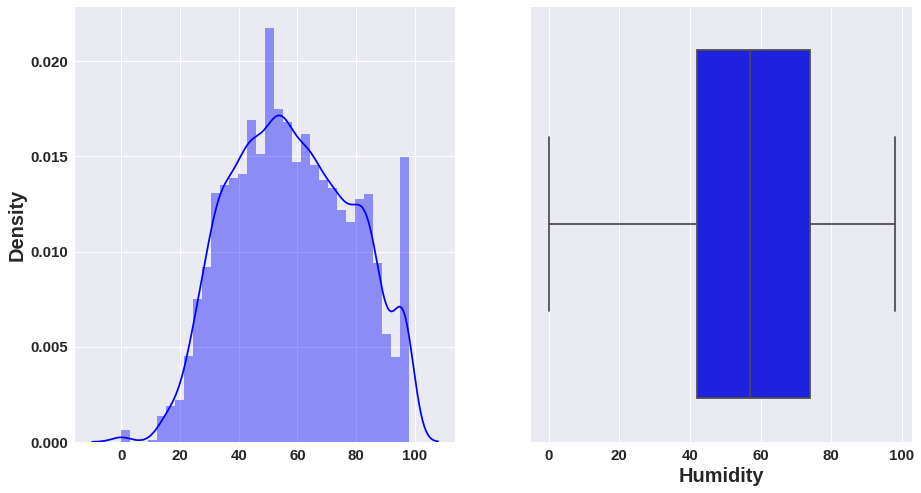

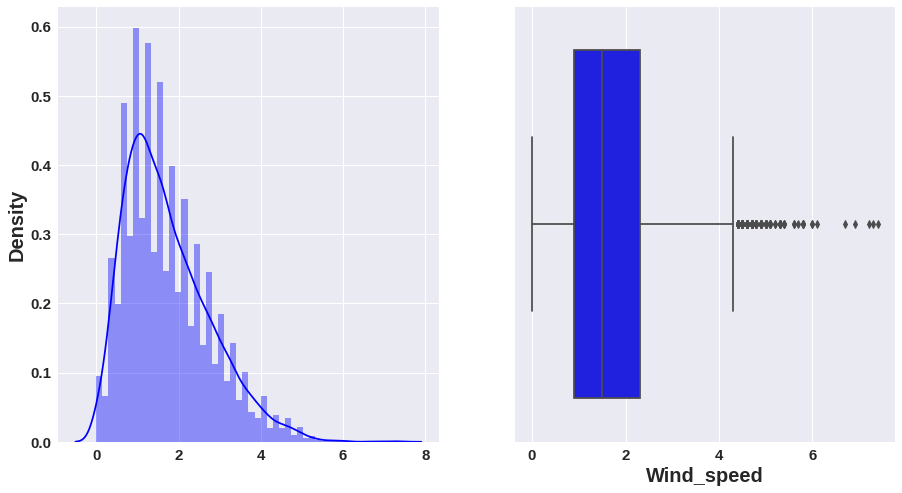

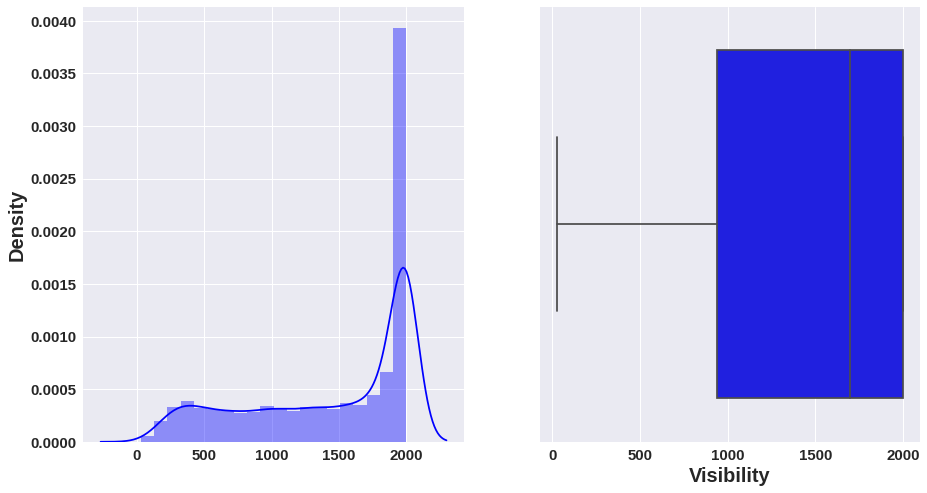

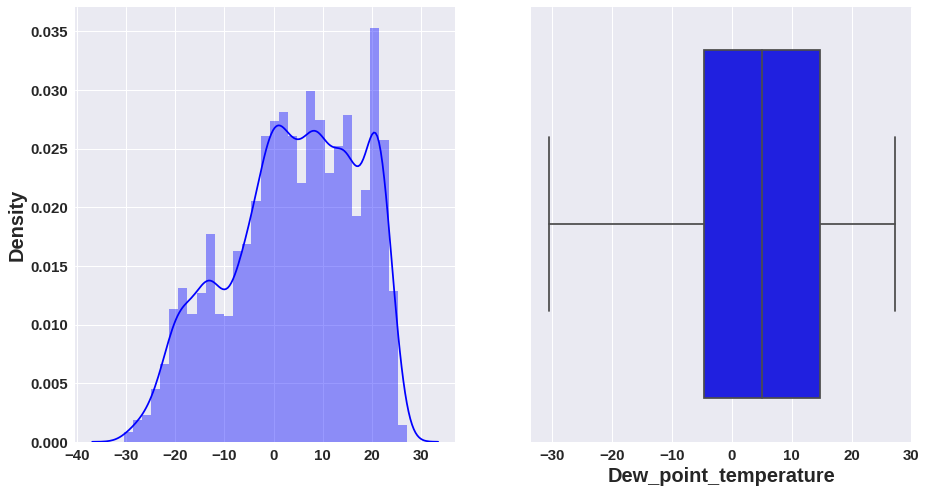

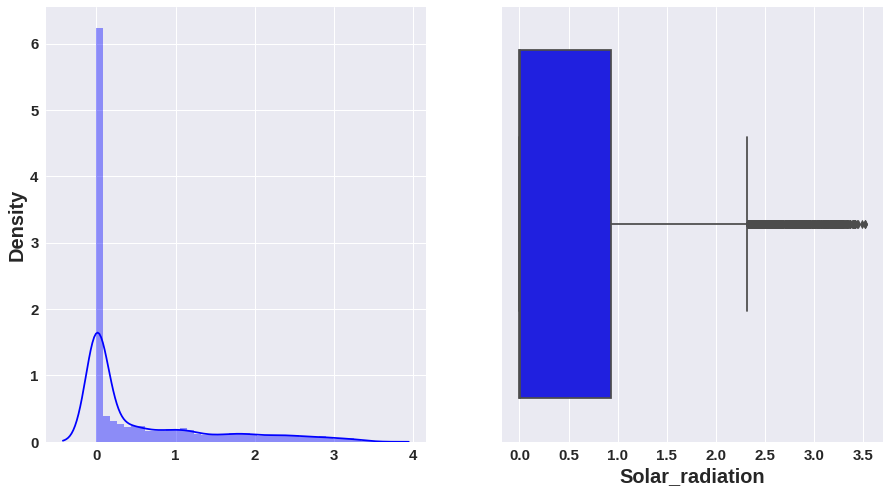

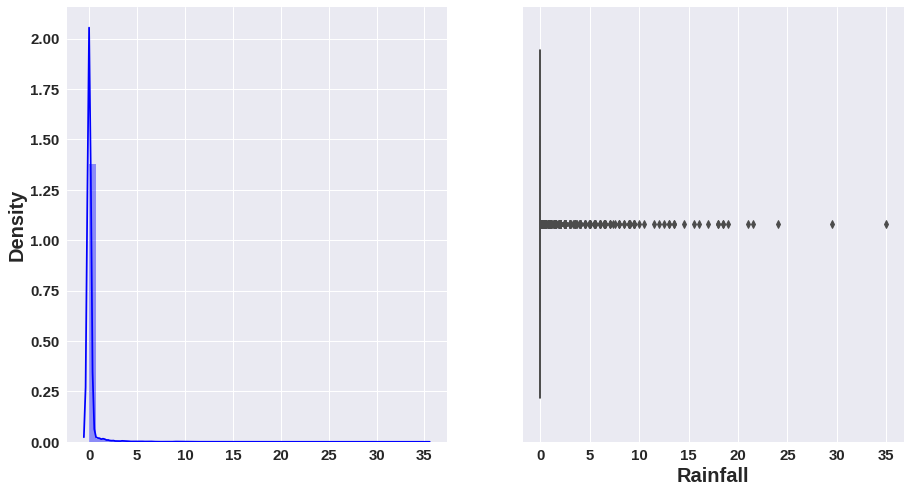

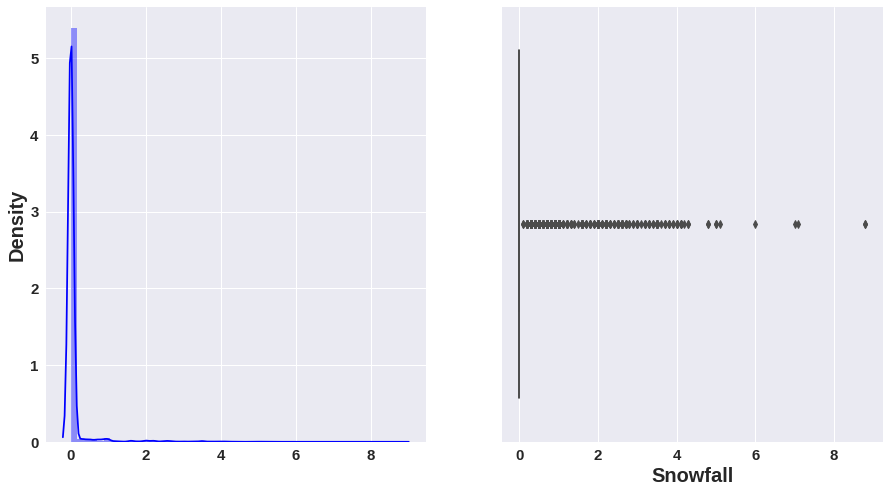

In [ ]:
# Plotting distribution plot and boxplot for all numerical column
for col in num_features:
 f, axes = plt.subplots(1, 2,figsize=(15,8))
 sns.distplot(x=df[col],color='blue',ax=axes[0])
 sns.boxplot(x=df[col],color='blue',ax=axes[1])

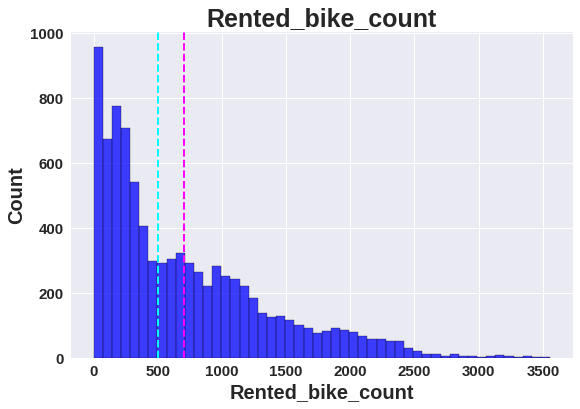

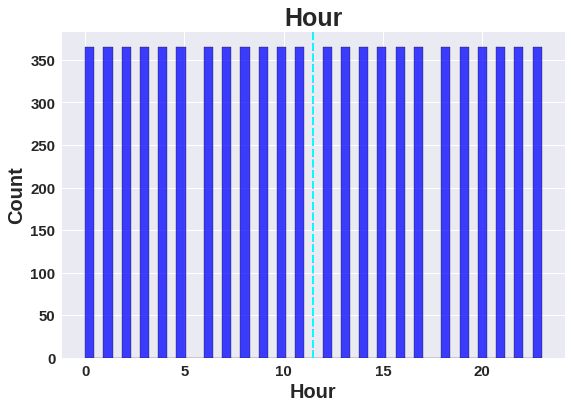

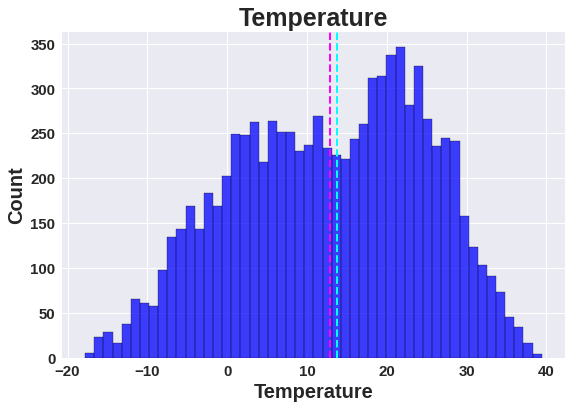

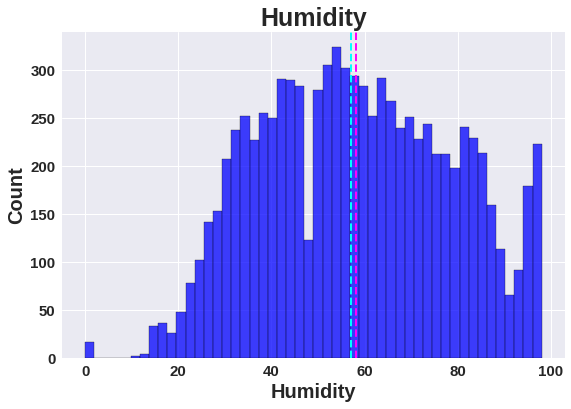

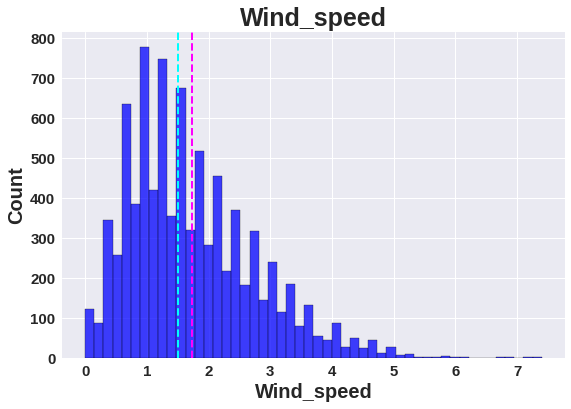

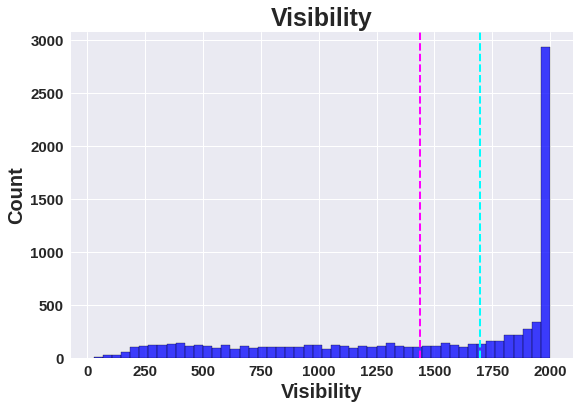

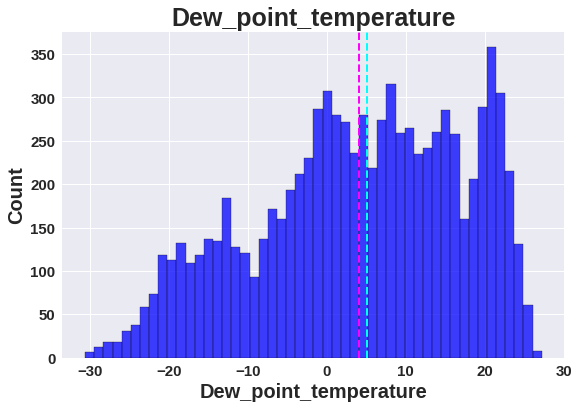

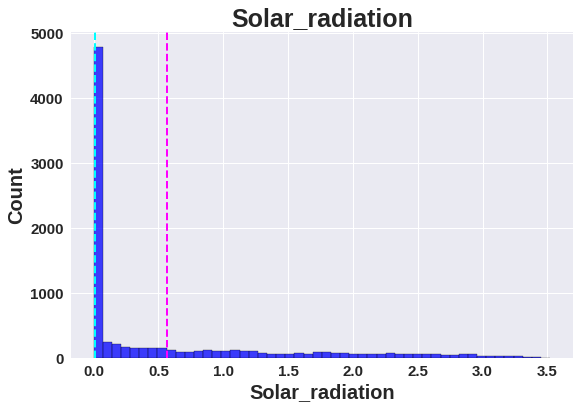

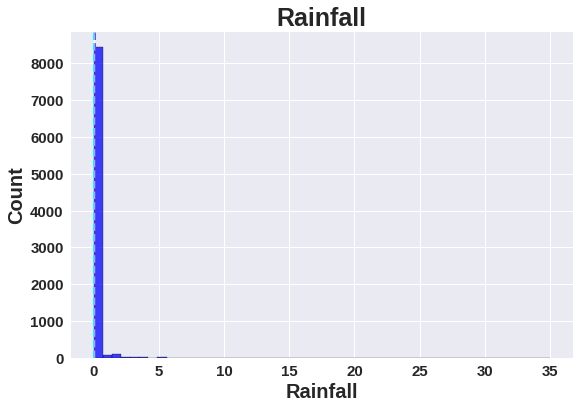

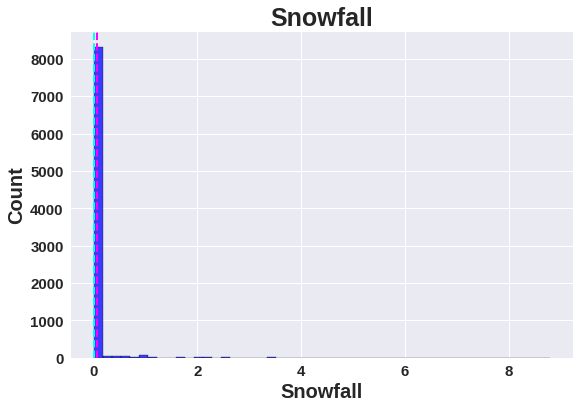

In [ ]:
# Plotting histogram of numerical features
for col in num_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.histplot(x=df[col],color='blue',ax=ax,bins=50)
    
    ax.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

#####To remove outliers taking square root of all the numerical features

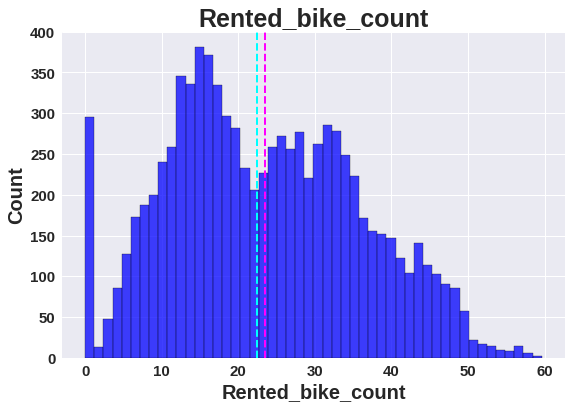

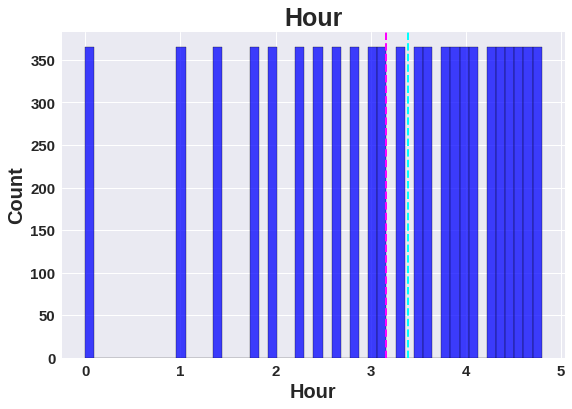

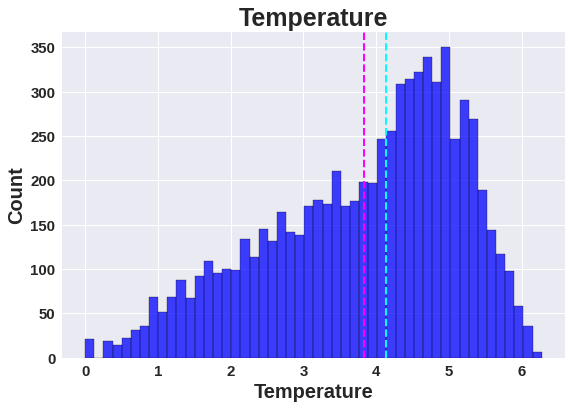

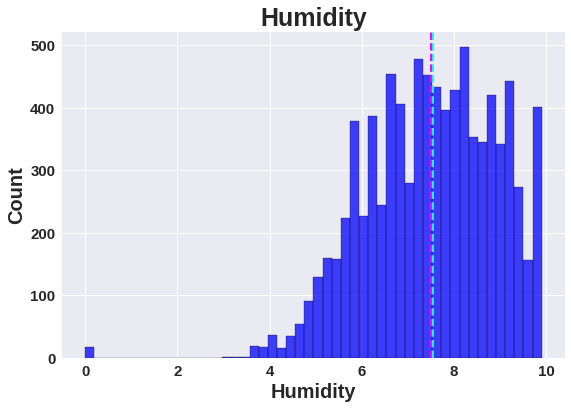

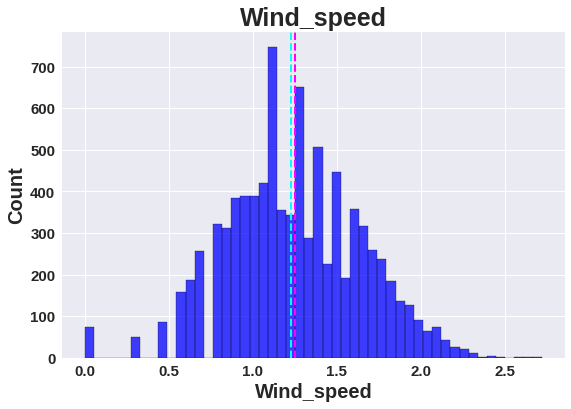

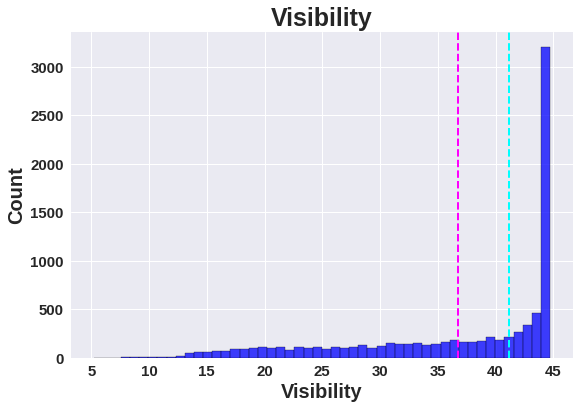

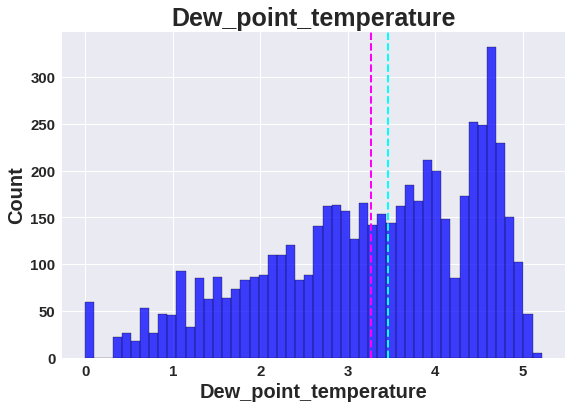

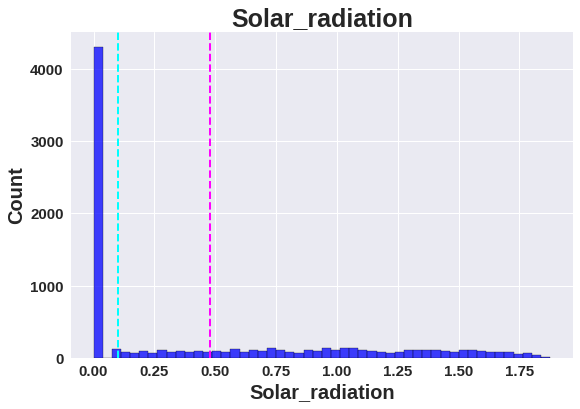

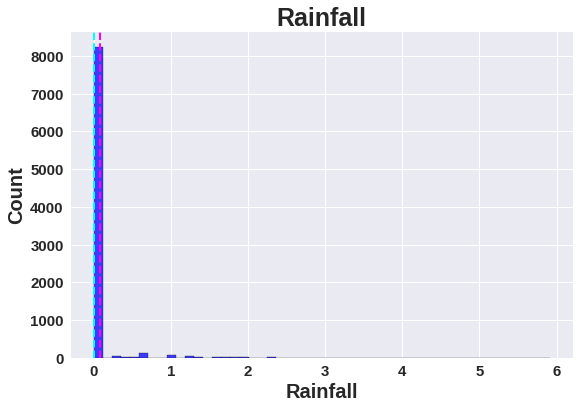

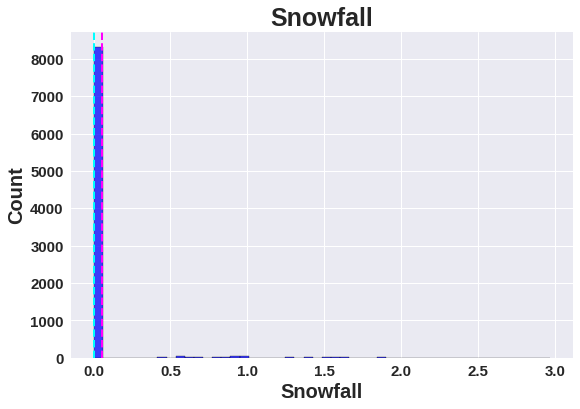

In [ ]:
# Plotting histogram of numerical features
for col in num_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.histplot(x=np.sqrt(df[col]),color='blue',ax=ax,bins=50)
    
    ax.axvline(np.sqrt(df[col]).mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(np.sqrt(df[col]).median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

##### Checking distribution of target variable 'Rented_bike_count'

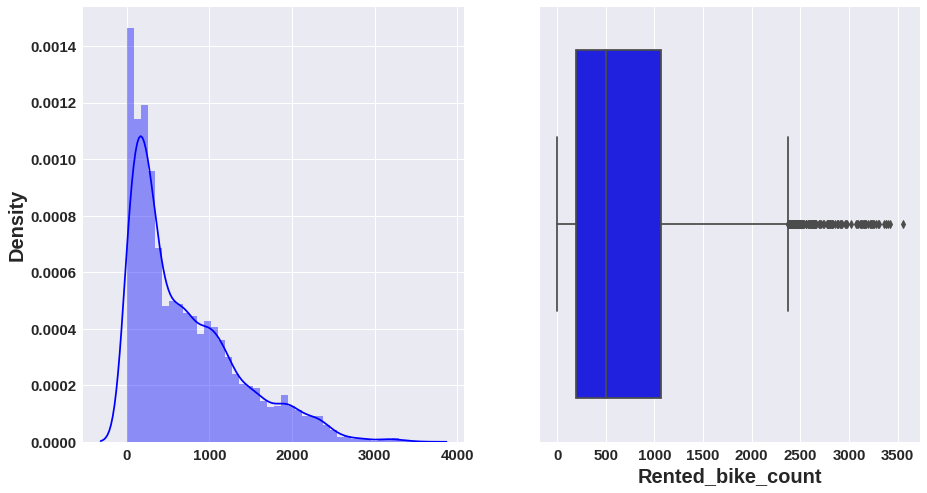

In [ ]:
# Plotting distribution plot and boxplot of 'Rented_bike_count'
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=df['Rented_bike_count'],color='blue',ax=axes[0])
sns.boxplot(x=df['Rented_bike_count'],color='blue',ax=axes[1]);

##### Taking sqaure root of feature 'rented_bike_count' to check distribution is normal or not 

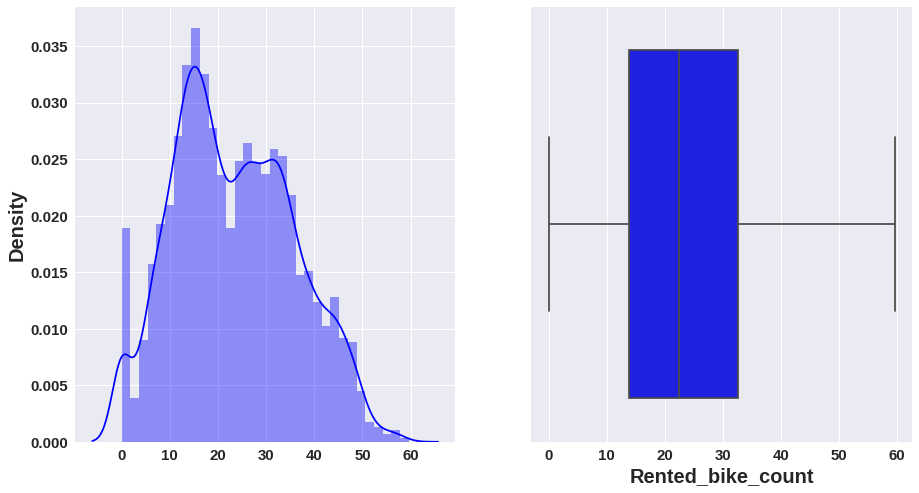

In [ ]:
# Plotting distribution plot and boxplot of 'Rented_bike_count'
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=np.sqrt(df['Rented_bike_count']),color='blue',ax=axes[0])
sns.boxplot(x=np.sqrt(df['Rented_bike_count']),color='blue',ax=axes[1]);

##### What all outlier treatment techniques have you used and why did you use those techniques?

1. Taking square root of features helped in removing skewness of some of the numerical column.Transformation didnt help too much so we are keeping as it is.Outliers are not removed as we have less data. 
2. Taking square root of target variable 'rented_bike_count' completely removed the skewness.We will transform the feature in further steps.

### 4. Feature Manipulation & Selection

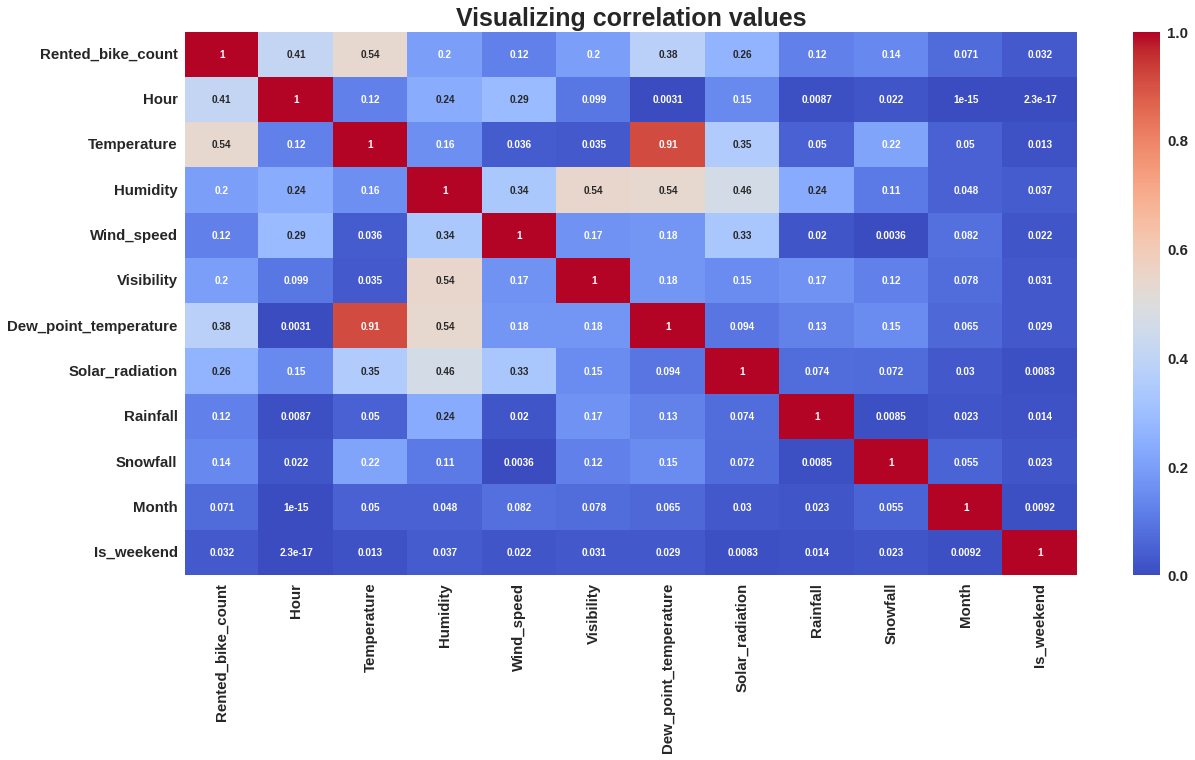

In [ ]:
# Visualizing correlation values
plt.figure(figsize=(20,10))
sns.heatmap(abs(df.corr()),cmap='coolwarm',annot=True)
plt.title("Visualizing correlation values");

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

from statsmodels.stats.outliers_influence import variance_inflation_factor

def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_bike_count','Dew_point_temperature','Humidity','Visibility']]])

variables       VIF
0             Hour  3.755736
1      Temperature  2.492225
2       Wind_speed  3.748534
3  Solar_radiation  1.893823
4         Rainfall  1.030569
5         Snowfall  1.077566
6            Month  3.049391
7       Is_weekend  1.350943

1. Removing features 'Dew_point_temperature','Humidity','Visibility' to reduce multicollinearity.
2. Remaining features have VIF values less than 5,so we are keeping those features.  

In [ ]:
# Droping columns 'Dew_point_temperature','Humidity','Visibility' as they have multicollinearity
df.drop(columns=['Dew_point_temperature','Humidity','Visibility'],axis=1,inplace=True)

##### What all feature selection methods have you used  and why?

1. Variance inflation factor(VIF) method helps in reducing multi-collinearity between the features.
2. Also it helps to identifying the features which greatly effects the target variables through pearsons correlation values. 

##### Which all features you found important and why?

1. 'Rented_bike_count','Hour','Temperature','Wind_speed','Solar_radiation','Rainfall','Snowfall','Month', 'Is_weekend' are the features that are selected.
2. These features have high corelation with the target variable. 

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

# Creating One_Hot_Encoding for 'Seasons' feature
df=pd.get_dummies(df,columns=['Seasons'],prefix='Seasons',drop_first=True)

# Using label encoding for 'Holiday' feature. Labeling for holiday=1 and no holiday=0
df['Holiday']=df['Holiday'].map({'No Holiday':0, 'Holiday':1})

# # Labeling for Yes=1 and No=0
df['Functioning_day']=df['Functioning_day'].map({'Yes':1, 'No':0})

In [ ]:
list(df.columns)

['Rented_bike_count',
 'Hour',
 'Temperature',
 'Wind_speed',
 'Solar_radiation',
 'Rainfall',
 'Snowfall',
 'Holiday',
 'Functioning_day',
 'Month',
 'Is_weekend',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter']

#### What all categorical encoding techniques have you used & why did you use those techniques?

1. One Hot Encoding:To encode more than 2 categories in a feature this method is used.To avoid the problem of dummy trap one column is dropped to reduce multi-collinearity.
2. Binary label encoding:To label yes or no types of values in a feature

1. Droping 'Functioning_day' feature as it does not give any business information.
2. It is known that on non-business days no bikes will be rented.
3. We dont want the model to predict '0' as it is already known.

In [ ]:
# Taking only functioning days into account.Hence droping 298 rows 
df = df[df['Functioning_day']==1]

# Droping 'Functioning_day' feature as it is no point keeping 'Yes' category in categorical column.
df.drop(columns=['Functioning_day'],axis=1,inplace=True)

In [ ]:
pd.DataFrame(df['Rainfall'].value_counts())

Rainfall
0.0       7949
0.5        114
1.0         64
1.5         55
0.1         44
...        ...
1.9          1
3.3          1
17.0         1
1.4          1
1.8          1

[61 rows x 1 columns]

### 5. Data Transformation

In [ ]:
# Transform Your data

# Creating X variable to store independent variable
X = df.drop(columns='Rented_bike_count',axis=1)

# Creating y variable to store target variable and applying square root transformation for getting approx normal distribution
y = np.sqrt(df['Rented_bike_count'])


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Square root transformation is used for target variable 'rented_bike_count' to reduce skewness and make approx normal distribution

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [ ]:
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5925, 12)
(5925,)
(2540, 12)
(2540,)


##### What data splitting ratio have you used and why? 

30% data is used for testing and 70% for training to strike a balance between bias and variance.

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

stn_scalar = StandardScaler()
X_train= stn_scalar.fit_transform(X_train)
X_test = stn_scalar.transform(X_test)

##### Which method have you used to scale you data and why?
Standard Scaler is used for scaling to get data to range from -3 to 3 to get approx normal distribution

## ***7. ML Model Implementation***

### Linear Regression

In [ ]:
# Importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
# ML Model - 1 Implementation
linear_reg = LinearRegression()

# Fit the Algorithm
linear_reg.fit(X_train,y_train)

# Predict on the model
# Predict on train dataset 
y_pred_train = linear_reg.predict(X_train)

# Predict on test dataset
y_pred_test = linear_reg.predict(X_test)


In [ ]:
# Check coefficents
linear_reg.coef_

array([ 4.16478054,  5.05520424,  0.28741752,  1.0567541 , -2.47592655,
       -0.51015112, -0.72285124,  0.33513811, -0.2862089 , -1.35942726,
       -1.55973491, -2.89452324])

In [ ]:
coefficient_df = pd.DataFrame(linear_reg.coef_,index=X.columns,columns=['Coefficients'])
coefficient_df

Coefficients
Hour                 4.164781
Temperature          5.055204
Wind_speed           0.287418
Solar_radiation      1.056754
Rainfall            -2.475927
Snowfall            -0.510151
Holiday             -0.722851
Month                0.335138
Is_weekend          -0.286209
Seasons_Spring      -1.359427
Seasons_Summer      -1.559735
Seasons_Winter      -2.894523

In [ ]:
# Check intercept
linear_reg.intercept_

24.106151604181743

#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

##### Evaluation on training dataset

In [ ]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 61.29896613423858.
The Root Mean Squared Error(RMSE) is 7.829365627829536.
The R2 Score is 0.5676870373489267.


In [ ]:
#Saving train data set results in dataframe.
train_dict={'Model':"Linear Regression",
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

# create training_result dataframe
training_results_df=pd.DataFrame(train_dict,index=[1])
training_results_df            

Model       MSE     RMSE  R2_score
1  Linear Regression  61.29897  7.82937   0.56769

##### Evaluation on test dataset

In [ ]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_test)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred_test)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 58.35055590421212.
The Root Mean Squared Error(RMSE) is 7.63875355697591.
The R2 Score is 0.5759457282589886.


In [ ]:
#Saving test data set results in dataframe.
test_dict={'Model':"Linear Regression",
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

# create training_result dataframe
testing_results_df=pd.DataFrame(test_dict,index=[1])
testing_results_df  

Model       MSE     RMSE  R2_score
1  Linear Regression  58.35056  7.63875   0.57595

In [ ]:
def Check_homoscedasticity(y_test,y_pred_test):
  ''' Plots residuals vs predicted_values '''
  try:
     residuals = y_test - y_pred_test
     plt.figure(figsize=(18,8))
     plt.title('Homoscedasticity Check')
     sns.regplot(x=y_pred_test,y=residuals,line_kws={'color':'black'})
     plt.ylabel('Residuals')
     plt.xlabel('y_predicted_test')
  except:
         print('Check your code')   

In [ ]:
def Check_Residue_Distribution(y_test,y_pred_test):
  ''' Plots distribution of residues '''
  try:
     residuals = y_test - y_pred_test
     plt.figure(figsize=(18,8))
     plt.title('Distribution Plot')
     sns.distplot(x=residuals)
     plt.xlabel('Residuals')
  except:
         print('Check your code')  


In [ ]:
def Actual_vs_Predicted(y_test,y_pred_test):
  ''' Plots scatter plot of actual and predicted values '''
  try:
     
     plt.figure(figsize=(18,8))
     plt.title('Actual VS Predicted')
     sns.regplot(x=y_test,y=y_pred_test,line_kws={'color':'black'})
     plt.ylabel('Predicted')
     plt.xlabel('Actual')
  except:
         print('Check your code')   

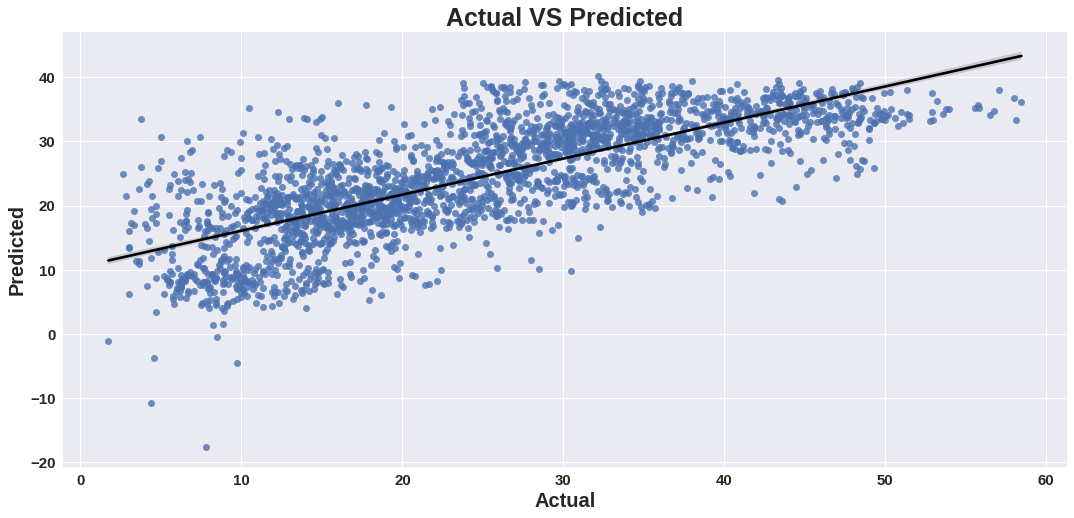

In [ ]:
# Plotting actual vs predicted
Actual_vs_Predicted(y_test,y_pred_test)

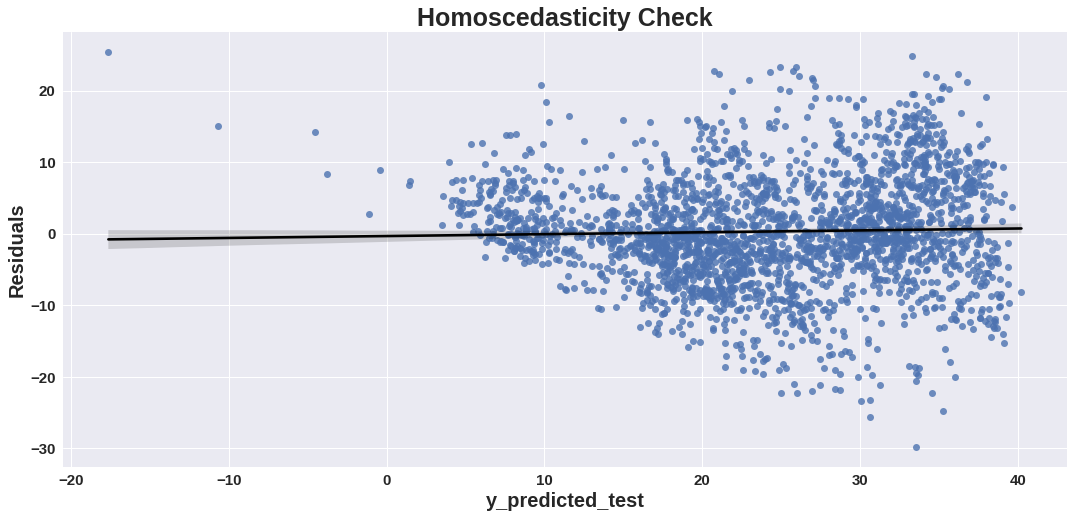

In [ ]:
# Checking homoscedasticity
Check_homoscedasticity(y_test,y_pred_test)

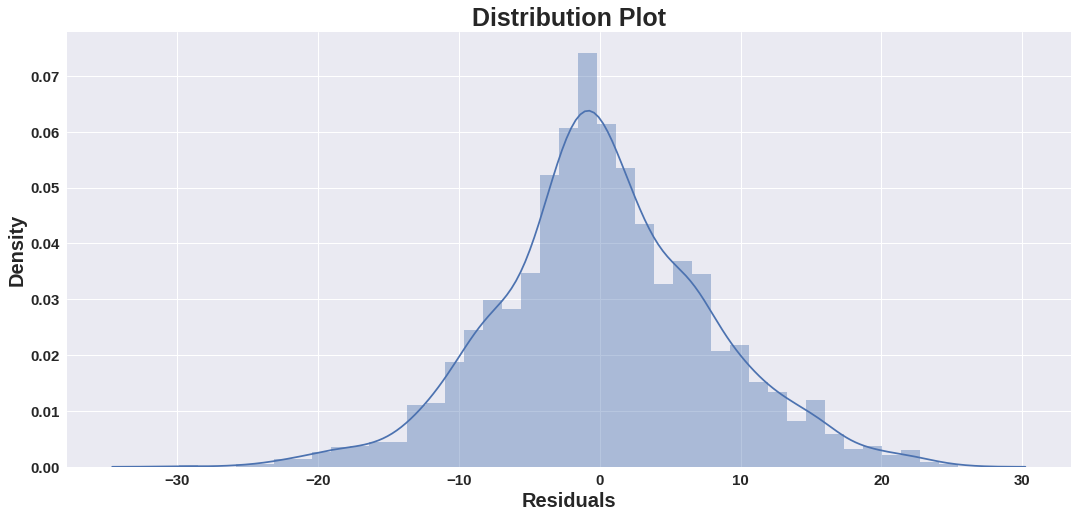

In [ ]:
# checking Distribution
Check_Residue_Distribution(y_test,y_pred_test)

1.  Model has not overfitted as we got similair R2 score for train(0.567) and test dataset(0.575). 

2. As overfiiting is not there,so regularization will have less impact.Then also we will try.  

### Lasso Regularization

#### Cross- Validation & Hyperparameter Tuning

In [ ]:
# Importing libraries
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso_regressor = Lasso()
parameters = {'alpha':[0.001,0.002,0.003,0.004,0.01,0.02,0.03,0.04,0.1,0.2,0.3,0.4]}
grid_search = GridSearchCV(lasso_regressor,parameters, scoring='neg_mean_squared_error', cv=4)    

# Fit the Algorithm
grid_search.fit(X_train,y_train)


GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.002, 0.003, 0.004, 0.01, 0.02, 0.03,
                                   0.04, 0.1, 0.2, 0.3, 0.4]},
             scoring='neg_mean_squared_error')

In [ ]:
print(f'The best alpha value is {grid_search.best_params_}')
print(f'The best negative mean squred error value is {grid_search.best_score_}')

The best alpha value is {'alpha': 0.004}
The best negative mean squred error value is -61.7359872319643


In [ ]:
# Fitting tuned model 
lasso_cv = grid_search.best_estimator_
lasso_cv.fit(X_train,y_train)

# Predict on the model
y_pred_train = lasso_cv.predict(X_train)
y_pred_test = lasso_cv.predict(X_test)

In [ ]:
lasso_cv.coef_

array([ 4.16346908,  5.0441494 ,  0.28310312,  1.05661478, -2.47226536,
       -0.50647891, -0.71802786,  0.33485034, -0.28204492, -1.34576541,
       -1.5409516 , -2.88828453])

In [ ]:
coefficient_df = pd.DataFrame(lasso_cv.coef_,index=X.columns,columns=['Coefficients'])
coefficient_df

Coefficients
Hour                 4.163469
Temperature          5.044149
Wind_speed           0.283103
Solar_radiation      1.056615
Rainfall            -2.472265
Snowfall            -0.506479
Holiday             -0.718028
Month                0.334850
Is_weekend          -0.282045
Seasons_Spring      -1.345765
Seasons_Summer      -1.540952
Seasons_Winter      -2.888285

#### Evaluating training dataset

In [ ]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 61.2992543073015.
The Root Mean Squared Error(RMSE) is 7.829384031154782.
The R2 Score is 0.5676850049989794.


In [ ]:
train_dict={'Model':'Lasso CV',
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

training_results_df=training_results_df.append(train_dict,ignore_index=True)
training_results_df             


Model       MSE     RMSE  R2_score
0  Linear Regression  61.29897  7.82937   0.56769
1           Lasso CV  61.29925  7.82938   0.56769

#### Evaluating test dataset

In [ ]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_test)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred_test)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 58.356898123581686.
The Root Mean Squared Error(RMSE) is 7.639168680136713.
The R2 Score is 0.5758996370920013.


In [ ]:
test_dict={'Model':'Lasso CV',
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

testing_results_df=testing_results_df.append(test_dict,ignore_index=True)
testing_results_df  

Model       MSE     RMSE  R2_score
0  Linear Regression  58.35056  7.63875   0.57595
1           Lasso CV  58.35690  7.63917   0.57590

##### Which hyperparameter optimization technique have you used and why?

Grid search cross validation as it helps in reducing overfitting

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is no such significant improvement.Probabilily model is not overfitted so regularization has less impact.

### Ridge Regression

####  Cross- Validation & Hyperparameter Tuning

In [ ]:
# Importing libraries
from sklearn.linear_model import Ridge

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge_regressor = Ridge()
parameters = {'alpha':[0.001,0.002,0.003,0.004,0.01,0.02,0.03,0.04,0.1,0.2,0.3,0.4]}
grid_search = GridSearchCV(ridge_regressor,parameters, scoring='neg_mean_squared_error', cv=4)    

# Fit the Algorithm
grid_search.fit(X_train,y_train)


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.002, 0.003, 0.004, 0.01, 0.02, 0.03,
                                   0.04, 0.1, 0.2, 0.3, 0.4]},
             scoring='neg_mean_squared_error')

In [ ]:
print(f'The best alpha value is {grid_search.best_params_}')
print(f'The best negative mean squred error value is {grid_search.best_score_}')

The best alpha value is {'alpha': 0.4}
The best negative mean squred error value is -61.73640094806974


In [ ]:
# Fitting tuned model 
ridge_cv = grid_search.best_estimator_
ridge_cv.fit(X_train,y_train)

# Predict on the model
y_pred_train = ridge_cv.predict(X_train)
y_pred_test = ridge_cv.predict(X_test)

In [ ]:
coefficient_df = pd.DataFrame(ridge_cv.coef_,index=X.columns,columns=['Coefficients'])
coefficient_df

Coefficients
Hour                 4.164619
Temperature          5.054053
Wind_speed           0.287395
Solar_radiation      1.056965
Rainfall            -2.475742
Snowfall            -0.510189
Holiday             -0.722766
Month                0.335220
Is_weekend          -0.286187
Seasons_Spring      -1.359043
Seasons_Summer      -1.558807
Seasons_Winter      -2.894666

#### Evaluating on train dataset

In [ ]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 61.298966695192114.
The Root Mean Squared Error(RMSE) is 7.829365663653226.
The R2 Score is 0.5676870333927835.


In [ ]:
train_dict={'Model':'Ridge CV',
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

training_results_df=training_results_df.append(train_dict,ignore_index=True)
training_results_df             


Model       MSE     RMSE  R2_score
0  Linear Regression  61.29897  7.82937   0.56769
1           Lasso CV  61.29925  7.82938   0.56769
2           Ridge CV  61.29897  7.82937   0.56769

#### Evaluating on test dataset

In [ ]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_test)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred_test)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 58.35094262941451.
The Root Mean Squared Error(RMSE) is 7.638778870304763.
The R2 Score is 0.5759429177892077.


In [ ]:
test_dict={'Model':'Ridge CV',
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

testing_results_df=testing_results_df.append(test_dict,ignore_index=True)
testing_results_df  

Model       MSE     RMSE  R2_score
0  Linear Regression  58.35056  7.63875   0.57595
1           Lasso CV  58.35690  7.63917   0.57590
2           Ridge CV  58.35094  7.63878   0.57594

##### Which hyperparameter optimization technique have you used and why?

Grid search cross validation as it helps in reducing overfitting

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is no such significant improvement.Probabilily model is not overfitted so regularization has less impact.

#### Decision Tree Regressor

In [ ]:
# Importing libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display


In [ ]:
# ML Model - 3 Implementation
decision_tree_regressor = DecisionTreeRegressor(random_state=7)

# Fit the Algorithm
decision_tree_regressor.fit(X_train,y_train)

# Predict on the model
# Predict on train dataset
y_pred_train = decision_tree_regressor.predict(X_train)

# Predict on test dataset
y_pred_test = decision_tree_regressor.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 0.0003592254230457144.
The Root Mean Squared Error(RMSE) is 0.018953243074622202.
The R2 Score is 0.9999974665509601.


In [ ]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_test)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred_test)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 27.82264982632258.
The Root Mean Squared Error(RMSE) is 5.2747179854777615.
The R2 Score is 0.7978028944681448.


#### Looks like model has overfitted we will tune it next step using cross validation

####  2. Cross- Validation & Hyperparameter Tuning

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 4.2 MB/s 


In [ ]:
# Importing libaries
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
search_space = {'criterion': Categorical(['squared_error','friedman_mse','absolute_error','poisson']),
                'max_depth':Integer(3,10),
                'min_samples_split':Integer(20,100),
                'min_samples_leaf':Integer(20,100),
                'min_impurity_decrease':Real(2,100,prior='log-uniform')}

decision_tree_regressor_1 = DecisionTreeRegressor(random_state=7)
bayes_search = BayesSearchCV(decision_tree_regressor_1,search_space,scoring='neg_mean_squared_error',cv=4,n_iter=32,random_state=7)

# Fit the Algorithm
bayes_search.fit(X_train,y_train)


BayesSearchCV(cv=4, estimator=DecisionTreeRegressor(random_state=7), n_iter=32,
              random_state=7, scoring='neg_mean_squared_error',
              search_spaces={'criterion': Categorical(categories=('squared_error', 'friedman_mse', 'absolute_error', 'poisson'), prior=None),
                             'max_depth': Integer(low=3, high=10, prior='uniform', transform='normalize'),
                             'min_impurity_decrease': Real(low=2, high=100, prior='log-uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=20, high=100, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=20, high=100, prior='uniform', transform='normalize')})

In [ ]:
print(f'The best alpha value is {bayes_search.best_params_}')
print(f'The best negative mean squred error value is {bayes_search.best_score_}')

The best alpha value is OrderedDict([('criterion', 'friedman_mse'), ('max_depth', 10), ('min_impurity_decrease', 25.58923514259438), ('min_samples_leaf', 20), ('min_samples_split', 20)])
The best negative mean squred error value is -27.443999728935083


In [ ]:
# Fitting tuned model 
decision_tree_regressor_cv = bayes_search.best_estimator_
decision_tree_regressor_cv.fit(X_train,y_train)

# Predict on the model
y_pred_train = decision_tree_regressor_cv.predict(X_train)
y_pred_test = decision_tree_regressor_cv.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 19.562883662458784.
The Root Mean Squared Error(RMSE) is 4.422994874794542.
The R2 Score is 0.8620321234195822.


In [ ]:
train_dict={'Model':'Decision Tree CV',
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

training_results_df=training_results_df.append(train_dict,ignore_index=True)
training_results_df             


Model       MSE     RMSE  R2_score
0  Linear Regression  61.29897  7.82937   0.56769
1           Lasso CV  61.29925  7.82938   0.56769
2           Ridge CV  61.29897  7.82937   0.56769
3   Decision Tree CV  19.56288  4.42299   0.86203

In [ ]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_test)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred_test)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 20.196413517604945.
The Root Mean Squared Error(RMSE) is 4.494042002207472.
The R2 Score is 0.8532254698644601.


In [ ]:
test_dict={'Model':'Decision Tree CV',
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

testing_results_df=testing_results_df.append(test_dict,ignore_index=True)
testing_results_df  

Model       MSE     RMSE  R2_score
0  Linear Regression  58.35056  7.63875   0.57595
1           Lasso CV  58.35690  7.63917   0.57590
2           Ridge CV  58.35094  7.63878   0.57594
3   Decision Tree CV  20.19641  4.49404   0.85323

##### Which hyperparameter optimization technique have you used and why?

Bayesian Cross Validation is used for hyperparameter tuning. As it smartly searches between range of values provided instead of providing manual values as in grid search 

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes there is significant improvement in MSE and R2 score as compared to linear regression

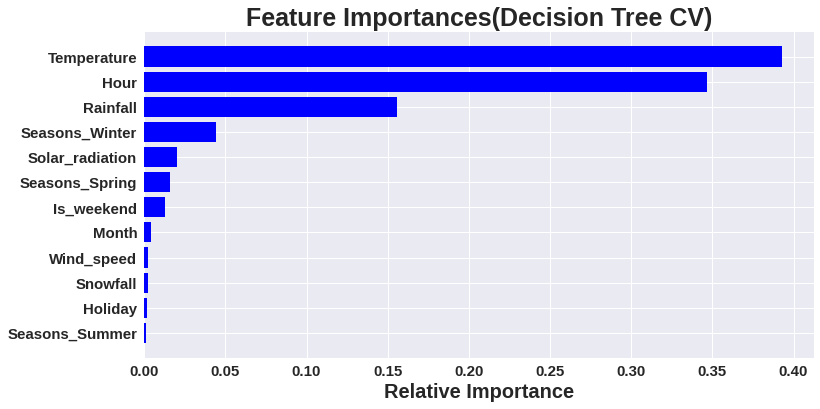

In [ ]:
# Feature importances
imp_variables=X.columns
importances = decision_tree_regressor_cv.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Decision Tree CV)')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance');

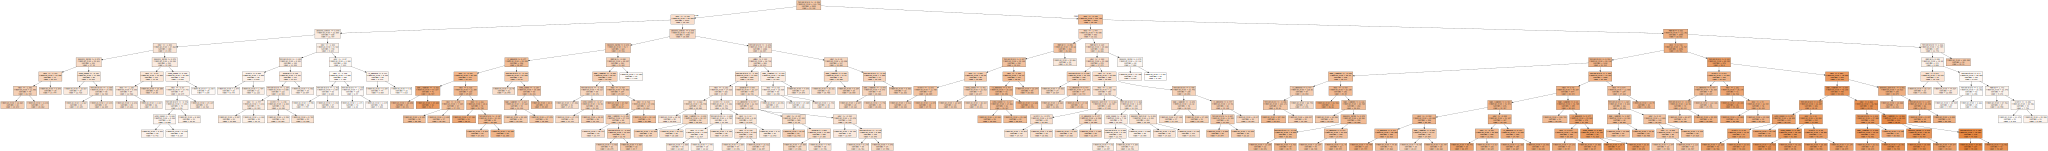

<Figure size 36x216 with 0 Axes>

In [ ]:
plt.figure(figsize=(0.5,3))
graph = Source(tree.export_graphviz(decision_tree_regressor_cv, out_file=None,feature_names=X.columns,filled = True))
display(SVG(graph.pipe(format='svg')))

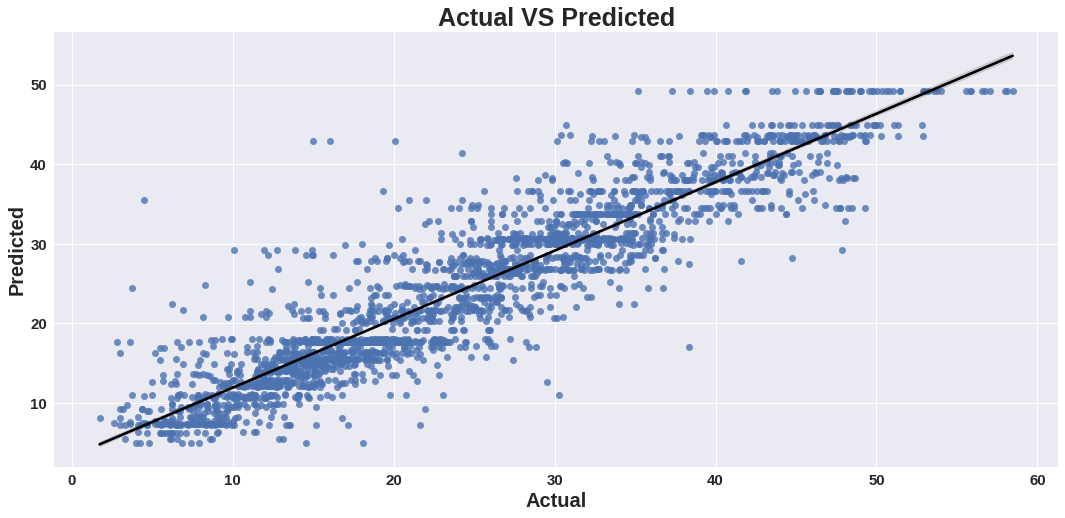

In [ ]:
# Plotting actual vs predicted
Actual_vs_Predicted(y_test,y_pred_test)

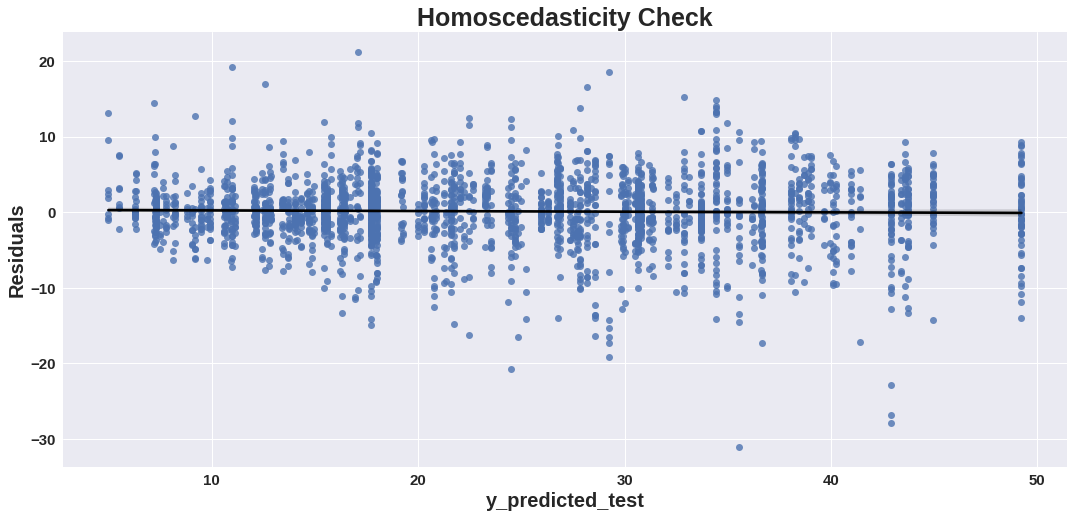

In [ ]:
# Checking homoscedasticity
Check_homoscedasticity(y_test,y_pred_test)

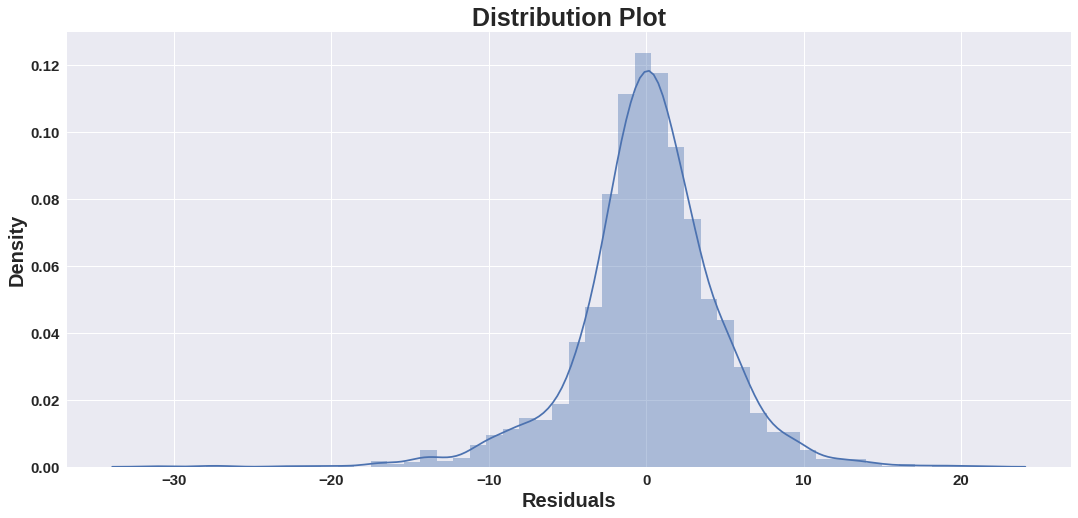

In [ ]:
# checking Distribution
Check_Residue_Distribution(y_test,y_pred_test)

#### Random Forest Regressor

In [ ]:
# Importing libraries
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# ML Model - 3 Implementation
random_forest_regressor = RandomForestRegressor(random_state=7)

# Fit the Algorithm
random_forest_regressor.fit(X_train,y_train)

# Predict on the model
# Predict on train dataset
y_pred_train = random_forest_regressor.predict(X_train)

# Predict on test dataset
y_pred_test = random_forest_regressor.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 2.323747419714449.
The Root Mean Squared Error(RMSE) is 1.5243842756058752.
The R2 Score is 0.9836116953543784.


In [ ]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_test)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred_test)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 14.475339581294161.
The Root Mean Squared Error(RMSE) is 3.8046471033847755.
The R2 Score is 0.8948025517627257.


#### Model has overfitted.Lets tune the model in the next step 

####  2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
search_space = {'n_estimators':Integer(50,200),
                'max_depth':Integer(3,10),
                'min_samples_split':Integer(20,100),
                'min_samples_leaf':Integer(20,100),
                'max_features':Categorical(['sqrt','log2', None]),
                'min_impurity_decrease':Real(2,100,prior='log-uniform')
                }

random_forest_regressor_1 = RandomForestRegressor(criterion = 'friedman_mse',oob_score = True,random_state=7)
bayes_search = BayesSearchCV(random_forest_regressor_1,search_space,scoring='neg_mean_squared_error',cv=4,n_iter=32,random_state=7)

# Fit the Algorithm
bayes_search.fit(X_train,y_train)

BayesSearchCV(cv=4,
              estimator=RandomForestRegressor(criterion='friedman_mse',
                                              oob_score=True, random_state=7),
              n_iter=32, random_state=7, scoring='neg_mean_squared_error',
              search_spaces={'max_depth': Integer(low=3, high=10, prior='uniform', transform='normalize'),
                             'max_features': Categorical(categories=('sqrt', 'log2', None), prior=None),
                             'min_impurity_decrease': Real(low=2, high=100, prior='log-uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=20, high=100, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=20, high=100, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=50, high=200, prior='uniform', transform='normalize')})

In [ ]:
print(f'The best alpha value is {bayes_search.best_params_}')
print(f'The best negative mean squred error value is {bayes_search.best_score_}')

The best alpha value is OrderedDict([('max_depth', 10), ('max_features', None), ('min_impurity_decrease', 2.0), ('min_samples_leaf', 20), ('min_samples_split', 31), ('n_estimators', 65)])
The best negative mean squred error value is -23.66050635504312


In [ ]:
# Fitting tuned model 
random_forest_regressor_cv = bayes_search.best_estimator_
random_forest_regressor_cv.fit(X_train,y_train)

# Predict on the model
y_pred_train = random_forest_regressor_cv.predict(X_train)
y_pred_test = random_forest_regressor_cv.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 18.799812331826733.
The Root Mean Squared Error(RMSE) is 4.3358750364634275.
The R2 Score is 0.867413708925237.


In [ ]:
train_dict={'Model':'Random Forest CV',
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

training_results_df=training_results_df.append(train_dict,ignore_index=True)
training_results_df 

Model       MSE     RMSE  R2_score
0  Linear Regression  61.29897  7.82937   0.56769
1           Lasso CV  61.29925  7.82938   0.56769
2           Ridge CV  61.29897  7.82937   0.56769
3   Decision Tree CV  19.56288  4.42299   0.86203
4   Random Forest CV  18.79981  4.33588   0.86741

In [ ]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_test)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred_test)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 19.25229564427562.
The Root Mean Squared Error(RMSE) is 4.387743798841909.
The R2 Score is 0.8600867107045571.


In [ ]:
test_dict={'Model':'Random Forest CV',
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

testing_results_df=testing_results_df.append(test_dict,ignore_index=True)
testing_results_df  

Model       MSE     RMSE  R2_score
0  Linear Regression  58.35056  7.63875   0.57595
1           Lasso CV  58.35690  7.63917   0.57590
2           Ridge CV  58.35094  7.63878   0.57594
3   Decision Tree CV  20.19641  4.49404   0.85323
4   Random Forest CV  19.25230  4.38774   0.86009

##### Which hyperparameter optimization technique have you used and why?

Bayesian Cross Validation is used for hyperparameter tuning. As it smartly searches between range of values provided instead of providing manual values as in grid search 

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is little improvement as compared to decision tree with respect to MSE and R2 score

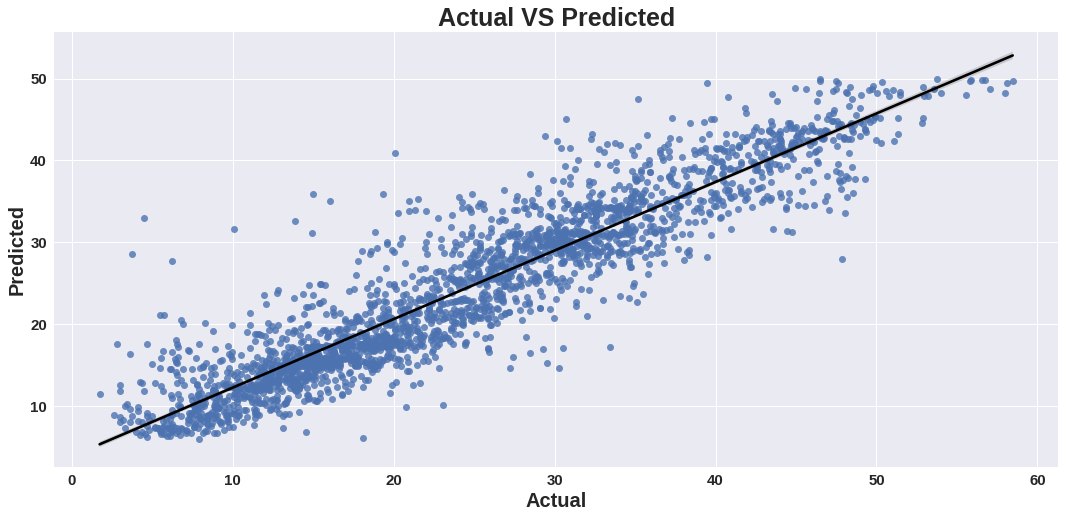

In [ ]:
# Plotting actual vs predicted
Actual_vs_Predicted(y_test,y_pred_test)

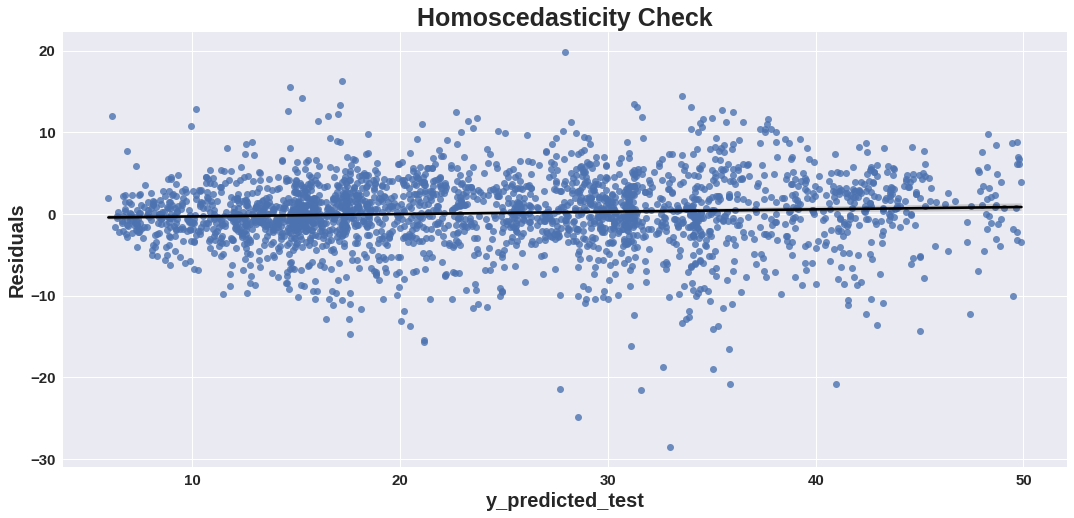

In [ ]:
# Checking homoscedasticity
Check_homoscedasticity(y_test,y_pred_test)

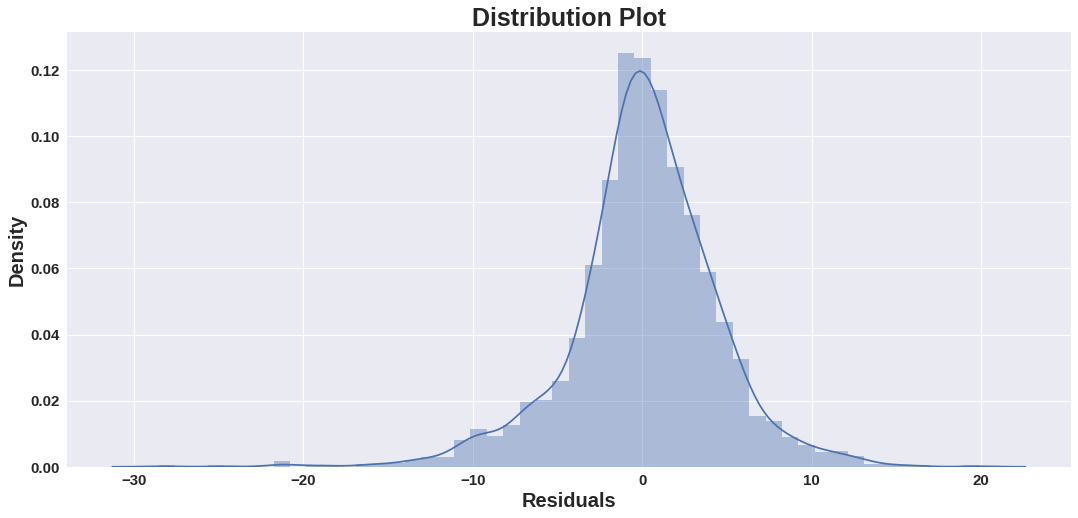

In [ ]:
# checking Distribution
Check_Residue_Distribution(y_test,y_pred_test)

#### Gradient Boosting

In [ ]:
# Importing libararies
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# ML Model - 3 Implementation
gradient_boosting_regressor = GradientBoostingRegressor(random_state=7)

# Fit the Algorithm
gradient_boosting_regressor.fit(X_train,y_train)

# Predict on the model
# Predict on train dataset
y_pred_train = gradient_boosting_regressor.predict(X_train)

# Predict on test dataset
y_pred_test = gradient_boosting_regressor.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 19.437311514878.
The Root Mean Squared Error(RMSE) is 4.408776646063849.
The R2 Score is 0.8629177250956076.


In [ ]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_test)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred_test)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 19.204698433905914.
The Root Mean Squared Error(RMSE) is 4.3823165602117236.
The R2 Score is 0.8604326165844147.


Looks like model performed well with default parameters,it has not overfitted.Also we would be checking with hyperparameter tuning

####  2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
search_space = {'loss':Categorical(['squared_error','absolute_error']),
                'learning_rate':Real(0.001,0.1,prior='log-uniform'),
                'n_estimators':Integer(100,300),
                'max_depth':Integer(10,20),
                'min_samples_split':Integer(50,150),
                'min_samples_leaf':Integer(50,150),
                'min_impurity_decrease':Real(2,50,prior='log-uniform')
                }

gradient_boosting_regressor_1 = GradientBoostingRegressor(random_state=7)
bayes_search = BayesSearchCV(gradient_boosting_regressor_1,search_space,scoring='neg_mean_squared_error',cv=4,n_iter=32,random_state=7)

# Fit the Algorithm
bayes_search.fit(X_train,y_train)

BayesSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=7),
              n_iter=32, random_state=7, scoring='neg_mean_squared_error',
              search_spaces={'learning_rate': Real(low=0.001, high=0.1, prior='log-uniform', transform='normalize'),
                             'loss': Categorical(categories=('squared_error', 'absolute_error'), prior=None),
                             'max_depth': Integer(low=10, high=20, prior='unif...sform='normalize'),
                             'min_impurity_decrease': Real(low=2, high=50, prior='log-uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=50, high=150, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=50, high=150, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=300, prior='uniform', transform='normalize')})

In [ ]:
print(f'The best alpha value is {bayes_search.best_params_}')
print(f'The best negative mean squred error value is {bayes_search.best_score_}')

The best alpha value is OrderedDict([('learning_rate', 0.09400651492022627), ('loss', 'squared_error'), ('max_depth', 20), ('min_impurity_decrease', 2.0), ('min_samples_leaf', 50), ('min_samples_split', 50), ('n_estimators', 300)])
The best negative mean squred error value is -15.907807604818142


In [ ]:
# Fitting tuned model 
gradient_boosting_regressor_cv = bayes_search.best_estimator_
gradient_boosting_regressor_cv.fit(X_train,y_train)

# Predict on the model
y_pred_train = gradient_boosting_regressor_cv.predict(X_train)
y_pred_test = gradient_boosting_regressor_cv.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 6.321231345863615.
The Root Mean Squared Error(RMSE) is 2.514205907610515.
The R2 Score is 0.9554193092792351.


In [ ]:
train_dict={'Model':'Gradient Boosting Regressor CV',
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

training_results_df=training_results_df.append(train_dict,ignore_index=True)
training_results_df 

Model       MSE     RMSE  R2_score
0               Linear Regression  61.29897  7.82937   0.56769
1                        Lasso CV  61.29925  7.82938   0.56769
2                        Ridge CV  61.29897  7.82937   0.56769
3                Decision Tree CV  19.56288  4.42299   0.86203
4                Random Forest CV  18.79981  4.33588   0.86741
5  Gradient Boosting Regressor CV   6.32123  2.51421   0.95542

In [ ]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_test)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred_test)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 13.658651452317356.
The Root Mean Squared Error(RMSE) is 3.6957612818359027.
The R2 Score is 0.9007377152655603.


In [ ]:
test_dict={'Model':'Gradient Boosting Regressor CV',
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

testing_results_df=testing_results_df.append(test_dict,ignore_index=True)
testing_results_df 

Model       MSE     RMSE  R2_score
0               Linear Regression  58.35056  7.63875   0.57595
1                        Lasso CV  58.35690  7.63917   0.57590
2                        Ridge CV  58.35094  7.63878   0.57594
3                Decision Tree CV  20.19641  4.49404   0.85323
4                Random Forest CV  19.25230  4.38774   0.86009
5  Gradient Boosting Regressor CV  13.65865  3.69576   0.90074

##### Which hyperparameter optimization technique have you used and why?

Bayesian Cross Validation is used for hyperparameter tuning. As it smartly searches between range of values provided instead of providing manual values as in grid search 

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is a good improvement from the Random Forest Model with respect to R2 score

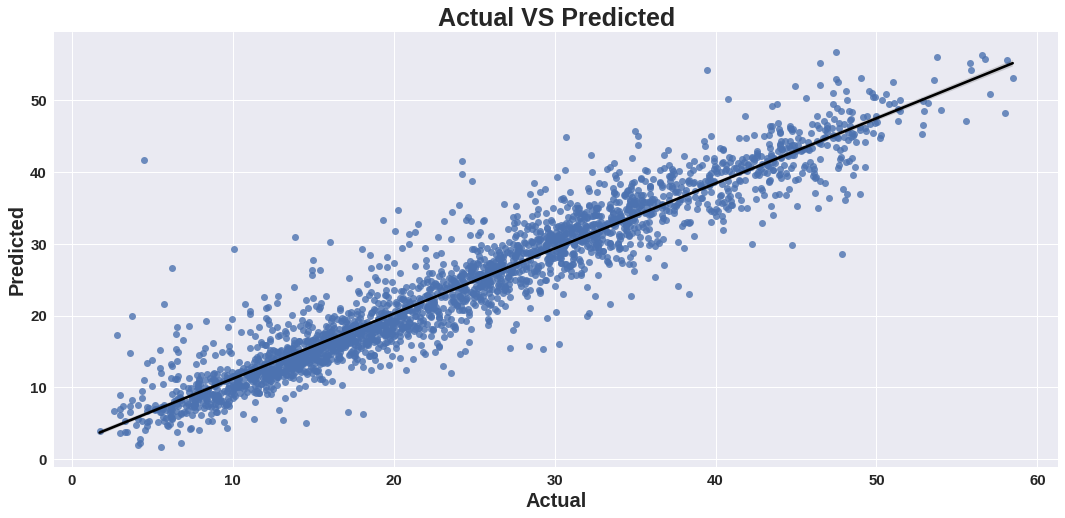

In [ ]:
# Plotting actual vs predicted
Actual_vs_Predicted(y_test,y_pred_test)

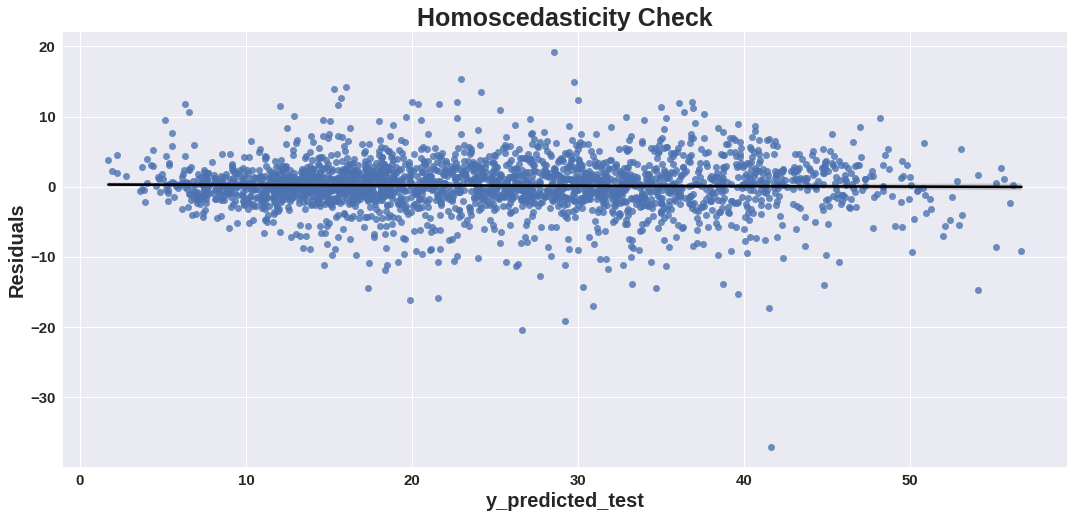

In [ ]:
# Checking homoscedasticity
Check_homoscedasticity(y_test,y_pred_test)

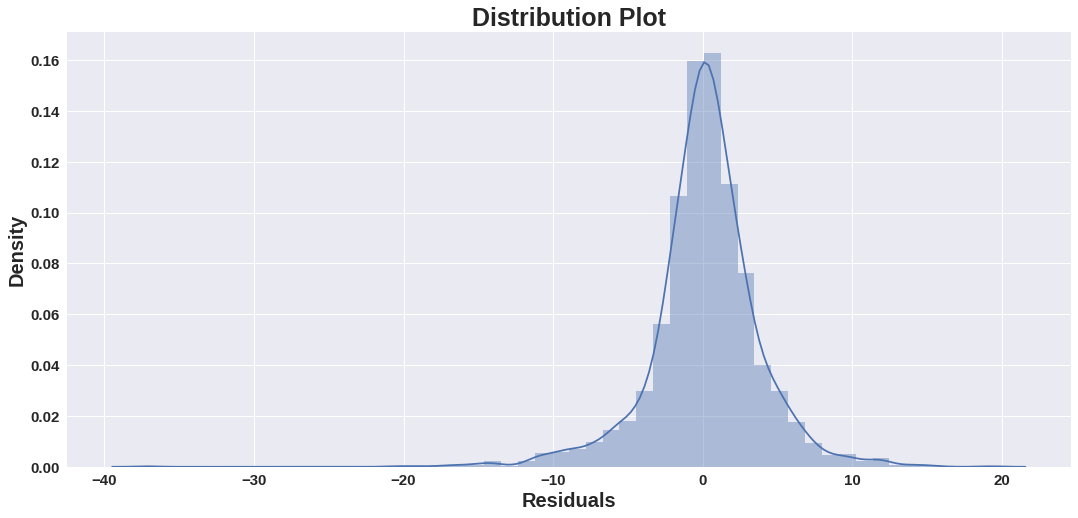

In [ ]:
# checking Distribution
Check_Residue_Distribution(y_test,y_pred_test)

#### XG Boosting

In [ ]:
# Importing libararies
from xgboost import XGBRegressor

In [ ]:
# ML Model - 3 Implementation
xgb_regressor = XGBRegressor(seed=7)

# Fit the Algorithm
xgb_regressor.fit(X_train,y_train)

# Predict on the model
# Predict on train dataset
y_pred_train = xgb_regressor.predict(X_train)

# Predict on test dataset
y_pred_test = xgb_regressor.predict(X_test)

[12:21:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 19.65355286952035.
The Root Mean Squared Error(RMSE) is 4.433232778630099.
The R2 Score is 0.8613926758726176.


In [ ]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_test)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred_test)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 19.544796277248874.
The Root Mean Squared Error(RMSE) is 4.420949703089696.
The R2 Score is 0.8579610044284613.


Model has not overfitted with good R2 score(train R2=0.861 and test R2=0.857).Still we will try hyperparameter tuning

####  2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
search_space = {
                'eta':Real(0.01,0.1,prior='log-uniform'),
                'n_estimators':Integer(150,300),
                'max_depth':Integer(8,15),
                'gamma':Real(2,40,prior='log-uniform'),
                'subsample':Real(0.5,0.9,prior='log-uniform'),
                'colsample_bytree':Real(0.5,0.9,prior='log-uniform')
                }

xgb_regressor_1 = XGBRegressor(seed=7)
bayes_search = BayesSearchCV(xgb_regressor_1,search_space,scoring='neg_mean_squared_error',cv=4,n_iter=32,random_state=7)

# Fit the Algorithm
bayes_search.fit(X_train,y_train)

[12:21:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:21:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:21:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:21:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:21:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:21:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:21:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:21:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

BayesSearchCV(cv=4, estimator=XGBRegressor(seed=7), n_iter=32, random_state=7,
              scoring='neg_mean_squared_error',
              search_spaces={'colsample_bytree': Real(low=0.5, high=0.9, prior='log-uniform', transform='normalize'),
                             'eta': Real(low=0.01, high=0.1, prior='log-uniform', transform='normalize'),
                             'gamma': Real(low=2, high=40, prior='log-uniform', transform='normalize'),
                             'max_depth': Integer(low=8, high=15, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=150, high=300, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.5, high=0.9, prior='log-uniform', transform='normalize')})

In [ ]:
print(f'The best alpha value is {bayes_search.best_params_}')
print(f'The best negative mean squred error value is {bayes_search.best_score_}')

The best alpha value is OrderedDict([('colsample_bytree', 0.9), ('eta', 0.01), ('gamma', 40.0), ('max_depth', 15), ('n_estimators', 300), ('subsample', 0.7470341834313103)])
The best negative mean squred error value is -15.601956756438728


In [ ]:
# Fitting tuned model 
xgb_regressor_cv = bayes_search.best_estimator_
xgb_regressor_cv.fit(X_train,y_train)

# Predict on the model
y_pred_train = xgb_regressor_cv.predict(X_train)
y_pred_test = xgb_regressor_cv.predict(X_test)

[12:27:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 3.144905284832502.
The Root Mean Squared Error(RMSE) is 1.7733880807179523.
The R2 Score is 0.9778204526652928.


In [ ]:
train_dict={'Model':'XGB Regressor CV',
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

training_results_df=training_results_df.append(train_dict,ignore_index=True)
training_results_df 

Model       MSE     RMSE  R2_score
0               Linear Regression  61.29897  7.82937   0.56769
1                        Lasso CV  61.29925  7.82938   0.56769
2                        Ridge CV  61.29897  7.82937   0.56769
3                Decision Tree CV  19.56288  4.42299   0.86203
4                Random Forest CV  18.79981  4.33588   0.86741
5  Gradient Boosting Regressor CV   6.32123  2.51421   0.95542
6                XGB Regressor CV   3.14491  1.77339   0.97782

In [ ]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_test)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred_test)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 12.877502664730105.
The Root Mean Squared Error(RMSE) is 3.5885237444846463.
The R2 Score is 0.9064146017169159.


In [ ]:
test_dict={'Model':'XGB Regressor CV',
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

testing_results_df=testing_results_df.append(test_dict,ignore_index=True)
testing_results_df 

Model       MSE     RMSE  R2_score
0               Linear Regression  58.35056  7.63875   0.57595
1                        Lasso CV  58.35690  7.63917   0.57590
2                        Ridge CV  58.35094  7.63878   0.57594
3                Decision Tree CV  20.19641  4.49404   0.85323
4                Random Forest CV  19.25230  4.38774   0.86009
5  Gradient Boosting Regressor CV  13.65865  3.69576   0.90074
6                XGB Regressor CV  12.87750  3.58852   0.90641

##### Which hyperparameter optimization technique have you used and why?

Bayesian Cross Validation is used for hyperparameter tuning. As it smartly searches between range of values provided instead of providing manual values as in grid search 

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is very little improvement as compared to Gradient Boosting

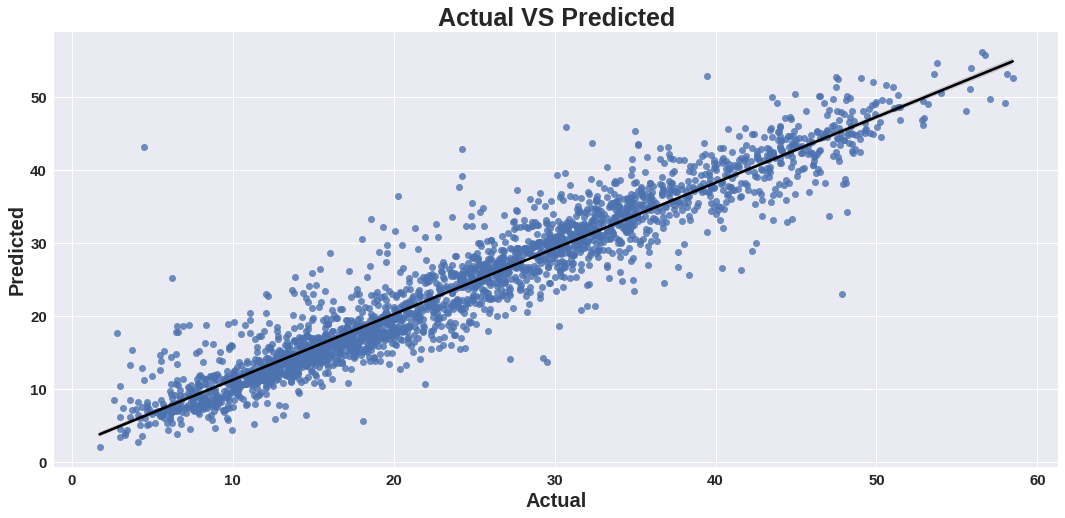

In [ ]:
# Plotting actual vs predicted
Actual_vs_Predicted(y_test,y_pred_test)

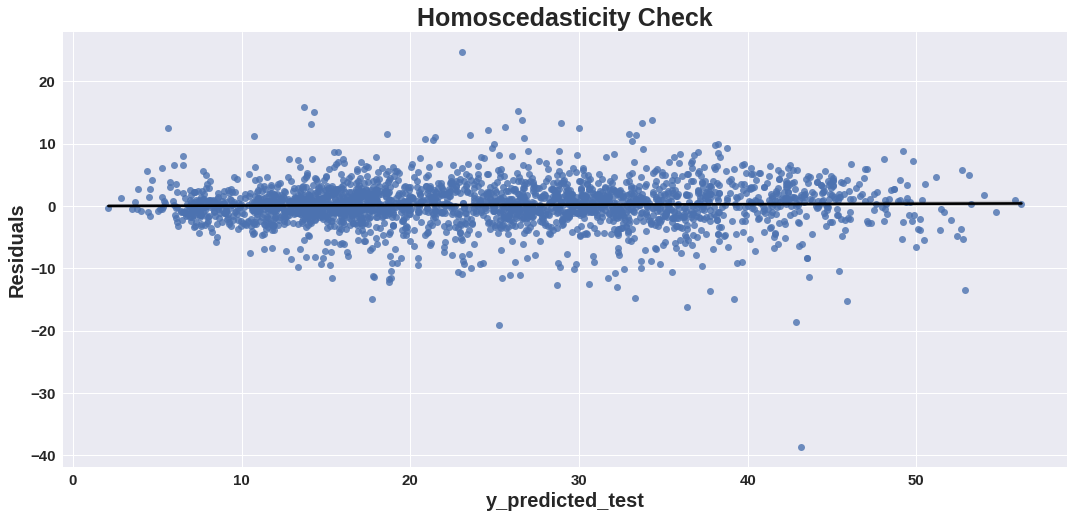

In [ ]:
# Checking homoscedasticity
Check_homoscedasticity(y_test,y_pred_test)

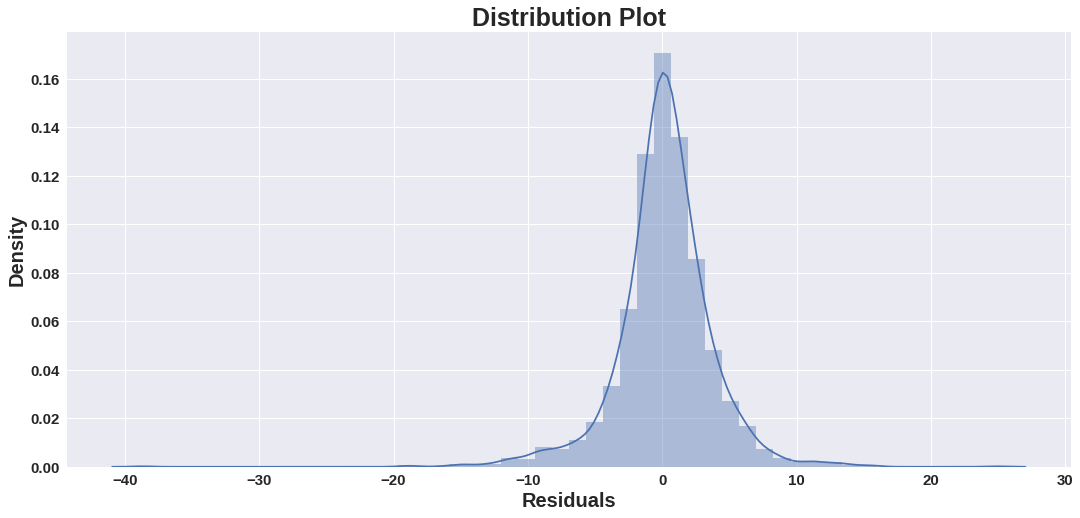

In [ ]:
# checking Distribution
Check_Residue_Distribution(y_test,y_pred_test)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

1. Mean squared Error(MSE) and R2 score is good metric for evaluating regression problem, it helps to capture errors which needs to be minimized.
2. Here we have used the R2 score to select the best model for the problem statement.  

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From the obtained R2 score on test dataset Gradient Boosting gives more accurate results.Hence Gradient Boosting is the selected model

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Gradient Boosting works on boosting technique.In boosting,multiple decision trees(weak learners) are trained in series based on the errors of previous models.Final output is given as, 
Output = Base learner + alpha(DT1) + alpha(DT2).... + alpha(DTn) 
where alpha = Learning Rate,
      DT = Decision Tree Output

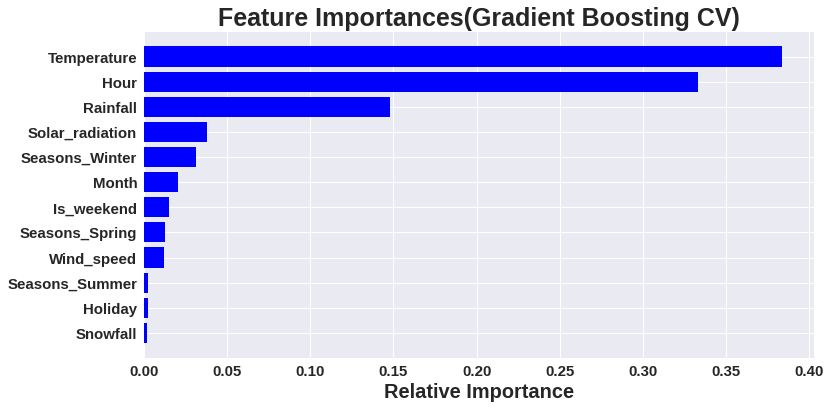

In [ ]:
# checking Feature imporatance
imp_variables=X.columns
importances = gradient_boosting_regressor_cv.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Gradient Boosting CV)')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance');

1. Temperature and Hour are the most important features.
2. Rainfall increases the number of bike rented decreases thus it has a negative impact.

# **Conclusion**

**Linear Regreesion with Lasso and Ridge regularization**
1. Linear Regression gave underfitted model as the feature relation with the target variable was non-linear one.
2. Also the lasso and ridge were not helpfull as the model did not overfitted it underfitted due to non-linear relationship.

**Decision Tree**
1. Decision Tree gave good increase in R2 score as compared to linear regression.
2. Train R2=0.862 and Test R2=0.853 were obtained.

**Random Forest**
1. Gave little gain as compared to decision tree.
2. Train R2=0.867 and Test R2=0.860 were obtained.

**Gradient Boosting and XGB Boosting**
1. Both boosting techniques gave very good R2 score,better than any of the model.
2. The reason for choosing Gradient Boosting over XGB Boosting is because very small difference between (train R2=0.955 and test R2=0.900) for Gradient Boosting as compared to XGB Boosting which is (train R2=0.977 and test R2=0.906)
3. Even though XGB and Gradient Boosting performed equally due to relatively large difference between Train and Test error it was not not selected.
4. Gradient Boosting seems to have generalized well on the given data.

##**Gradient Boosting is the model selected based on R2 score.**